In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from prophet import Prophet
import streamlit as st

In [2]:
df = pd.read_excel('orders.xlsx')
df

,Serial Number,Invoice Date,Product Name,Variant Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Party Company Name,Bill Date
0,INV/24-25/300,08 Jun 24,Baylink Offline Services,NaN,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,EMPROS FOOD AND BEVERAGES PRIVATE LIMITED,08 Jun 24
1,INV/24-25/299,08 Jun 24,Baylink Offline Services,NaN,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,ANISUE HEALTHCARE PRIVATE LIMITED,08 Jun 24
2,INV/24-25/298,08 Jun 24,Kerala Banana chips - Desi Masala- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,08 Jun 24,Kerala banana chips - Peri Peri- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,08 Jun 24,Kerala banana chips - Original Style- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...,...,...
3361,INV-12,05 Jan 24,Peach Iced Tea - Sachet,NaN,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,M/S ALFA SUPER MARKETS (YAS MART),05 Jan 24
3362,INV-11,02 Jan 24,Peach Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3363,INV-11,02 Jan 24,Lemon Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3364,INV-11,02 Jan 24,Wild Berries Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24


<Axes: xlabel='Invoice Date', ylabel='Qty'>

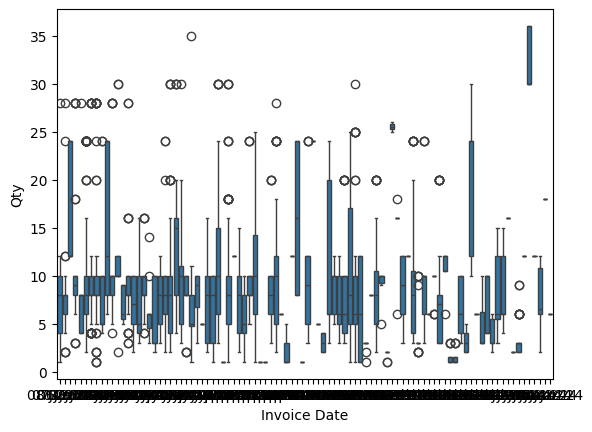

In [3]:
import seaborn as sns 


sns.boxplot(data=df, x='Invoice Date', y='Qty')

<Axes: xlabel='Product Name', ylabel='Qty'>

/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


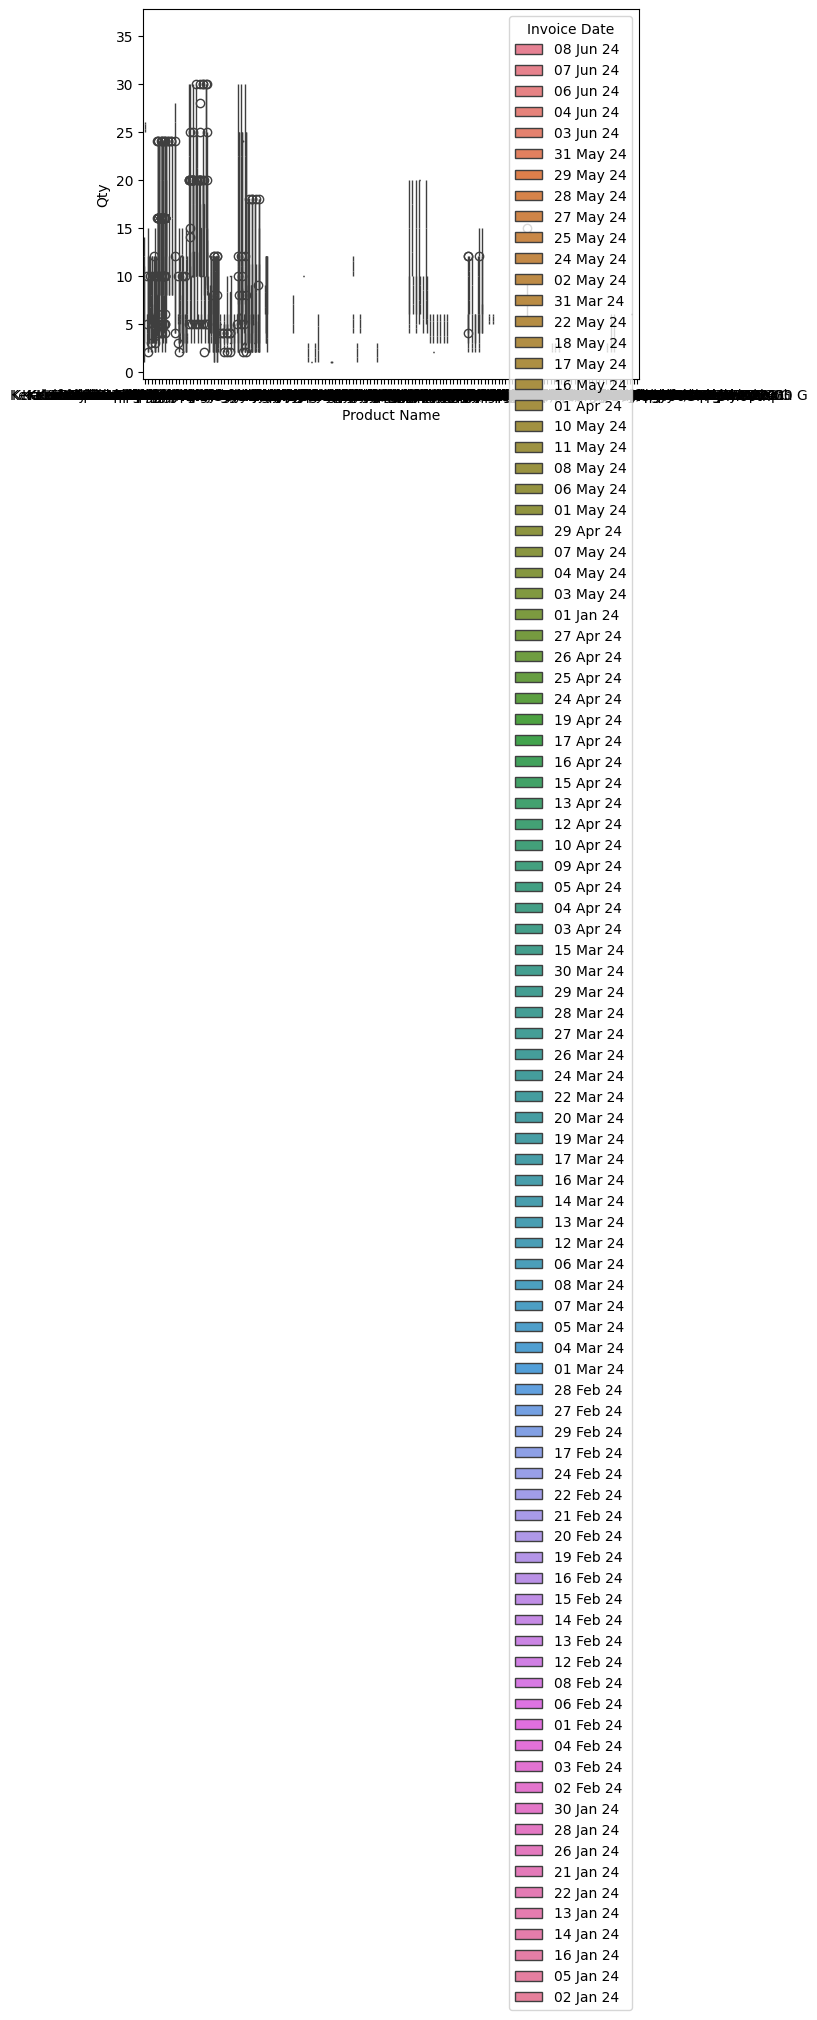

In [11]:

sns.boxplot(data=df, x='Product Name', y='Qty',hue='Invoice Date')

In [4]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d %b %y')

In [5]:
product_models = {}
products = df['Product Name'].unique()

In [6]:
df.isna().sum()

Serial Number             0
Invoice Date              1
Product Name              1
Variant Name           3366
Created Date & Time       1
Qty                       0
Price with Tax            0
Item Total Amount         0
Party Name                1
Party Company Name     2078
Bill Date                 1
dtype: int64

In [7]:
df[df['Product Name'] == 'Classic Cold Coffee']

,Serial Number,Invoice Date,Product Name,Variant Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Party Company Name,Bill Date
6,INV/24-25/298,2024-06-08,Classic Cold Coffee,NaN,08-06-2024 10:00 AM,4.0,37.5,150.0,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
11,INV/24-25/296,2024-06-08,Classic Cold Coffee,NaN,08-06-2024 09:53 AM,8.0,37.5,300.0,GSS Grocery Store,NaN,08 Jun 24
15,INV/24-25/295,2024-06-08,Classic Cold Coffee,NaN,08-06-2024 09:51 AM,4.0,37.5,150.0,Dilli bazar,M/S DILLI BAZAR,08 Jun 24
33,INV/24-25/291,2024-06-08,Classic Cold Coffee,NaN,08-06-2024 09:43 AM,8.0,37.5,300.0,Green valley mart,NaN,08 Jun 24
37,INV/24-25/290,2024-06-07,Classic Cold Coffee,NaN,07-06-2024 11:38 AM,8.0,37.5,300.0,NDB Sector 150 Ace Golf Shire,NDB CONVENIO,07 Jun 24
...,...,...,...,...,...,...,...,...,...,...,...
3012,INV-68,2024-02-17,Classic Cold Coffee,NaN,17-02-2024 07:33 PM,24.0,37.5,900.0,MS MART,M.S MART,17 Feb 24
3023,INV-67,2024-02-17,Classic Cold Coffee,NaN,17-02-2024 06:20 PM,8.0,37.5,300.0,Shop 8,NaN,17 Feb 24
3030,INV-66,2024-02-17,Classic Cold Coffee,NaN,17-02-2024 06:15 PM,8.0,37.5,300.0,Shop 6,NaN,17 Feb 24
3038,INV-65,2024-02-17,Classic Cold Coffee,NaN,17-02-2024 06:13 PM,8.0,37.5,300.0,Shop 5,NaN,17 Feb 24


In [8]:
for product in products:
    product_data = df[df['Product Name'] == product]
    if len(product_data) > 2:
        aggregated_data = product_data.groupby('Invoice Date')['Qty'].sum().reset_index()
        aggregated_data_prophet = aggregated_data.rename(columns={'Invoice Date': 'ds', 'Qty': 'y'})
        aggregated_data_prophet = aggregated_data_prophet[['ds', 'y']]
        product_models[product] = Prophet()
        product_models[product].fit(aggregated_data_prophet)

15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:15 - cmdstanpy - INFO - Chain [1] done processing
15:01:15 - cmdstanpy - INFO - Chain [1] start processing
15:01:16 - cmdstanpy - INFO - Chain [1] done processing
15:01:16 - cmdstanpy - INFO - Chain [1] start processing
15:01:16 - cmdstanpy - INFO - Chain [1]

/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
2024-06-13 15:01:36.968 
  command:

    streamlit run /Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/lazycodebaker/Doc

(<Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
            ds  yhat
 25 2024-06-09    23
 26 2024-06-10    18
 27 2024-06-11    12
 28 2024-06-12    12
 29 2024-06-13    14
 30 2024-06-14    21
 31 2024-06-15    13
 32 2024-06-16    23
 33 2024-06-17    18
 34 2024-06-18    12
 35 2024-06-19    12
 36 2024-06-20    14
 37 2024-06-21    22
 38 2024-06-22    13
 39 2024-06-23    24
 40 2024-06-24    19
 41 2024-06-25    12
 42 2024-06-26    12
 43 2024-06-27    15
 44 2024-06-28    22
 45 2024-06-29    14
 46 2024-06-30    24
 47 2024-07-01    19
 48 2024-07-02    13
 49 2024-07-03    13
 50 2024-07-04    15
 51 2024-07-05    22
 52 2024-07-06    14
 53 2024-07-07    24
 54 2024-07-08    19)

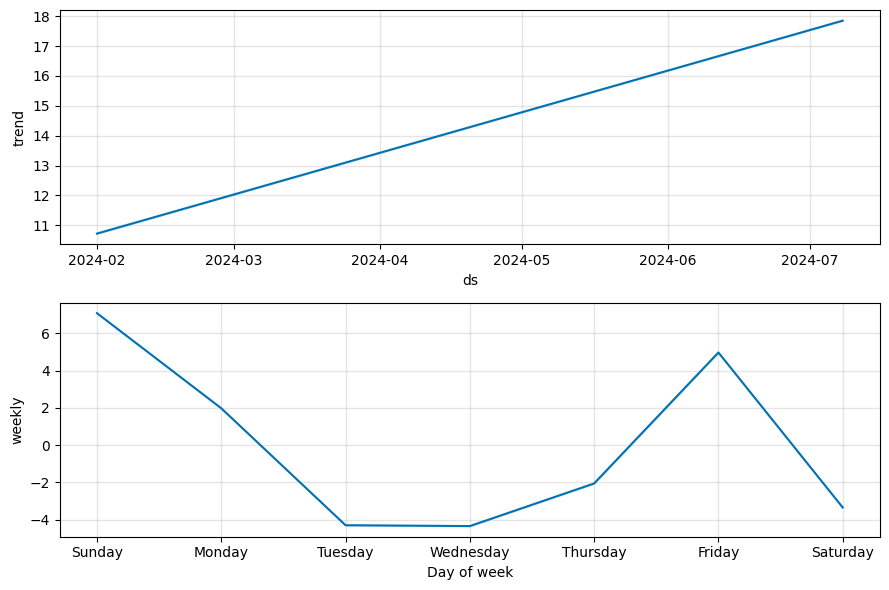

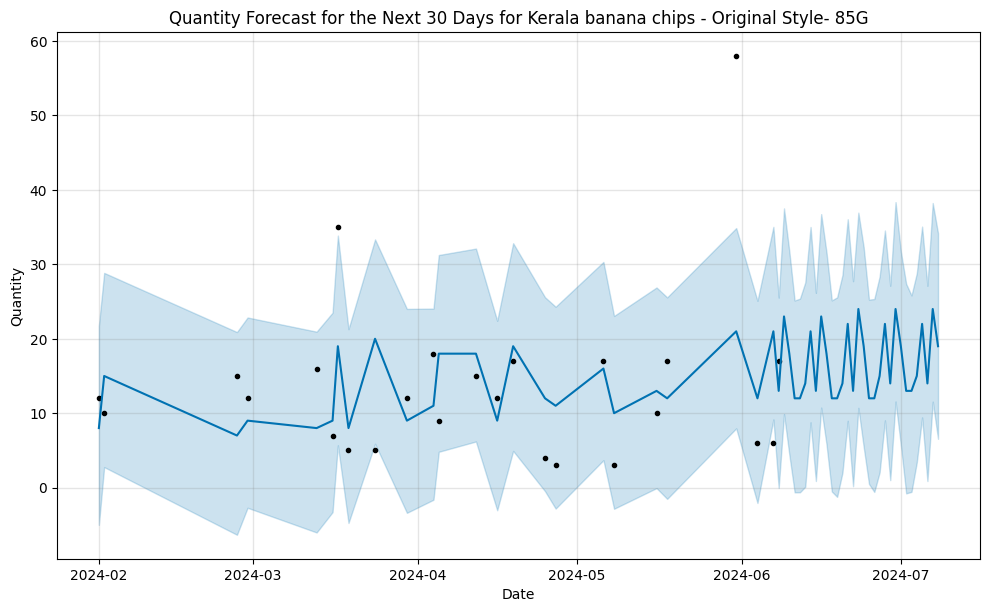

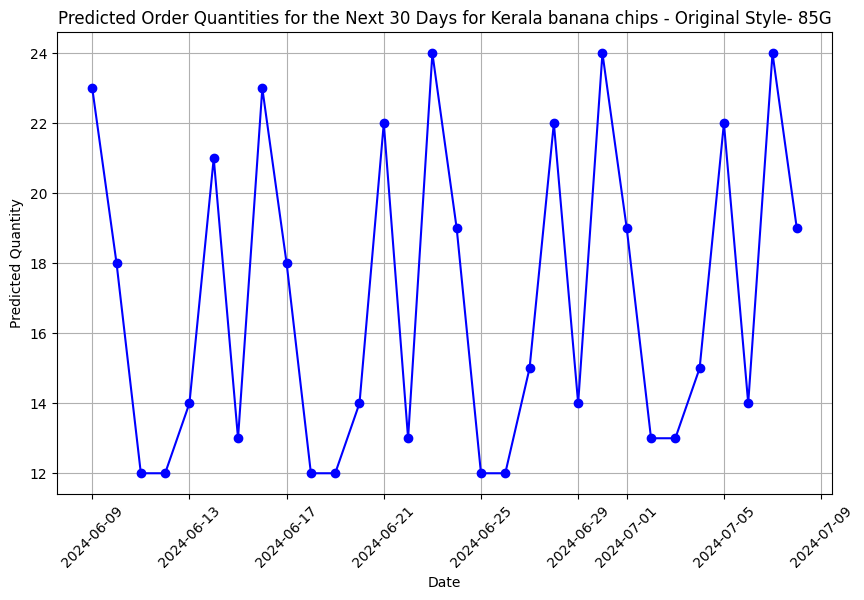

In [9]:
def predict_next_30_days(product_name, product_models):
    if product_name in product_models:
        model = product_models[product_name]
        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        forecast['yhat'] = forecast['yhat'].astype(int)

        accuracy = model.plot_components(forecast)

        st.pyplot(accuracy)
        
        fig1 = model.plot(forecast)
        plt.title(f'Quantity Forecast for the Next 30 Days for {product_name}')
        plt.xlabel('Date')
        plt.ylabel('Quantity')
        
        next_30_days = forecast[['ds', 'yhat']].tail(30)
        
        fig2, ax = plt.subplots(figsize=(10, 6))
        ax.plot(next_30_days['ds'], next_30_days['yhat'], marker='o', linestyle='-', color='b')
        ax.set_title(f'Predicted Order Quantities for the Next 30 Days for {product_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Predicted Quantity')
        ax.grid(True)

        plt.xticks(rotation=45)
        
        return fig1, fig2, next_30_days
    else:
        st.write(f"Product '{product_name}' not found in the data.")
        return None, None, None


predict_next_30_days('Kerala banana chips - Original Style- 85G', product_models)

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

import tqdm as notebook_tqdm

In [3]:
df = pd.read_excel("orders.xlsx")

In [4]:
df

,Serial Number,Invoice Date,Product Name,Variant Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Party Company Name,Bill Date
0,INV/24-25/300,08 Jun 24,Baylink Offline Services,NaN,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,EMPROS FOOD AND BEVERAGES PRIVATE LIMITED,08 Jun 24
1,INV/24-25/299,08 Jun 24,Baylink Offline Services,NaN,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,ANISUE HEALTHCARE PRIVATE LIMITED,08 Jun 24
2,INV/24-25/298,08 Jun 24,Kerala Banana chips - Desi Masala- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,08 Jun 24,Kerala banana chips - Peri Peri- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,08 Jun 24,Kerala banana chips - Original Style- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...,...,...
3361,INV-12,05 Jan 24,Peach Iced Tea - Sachet,NaN,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,M/S ALFA SUPER MARKETS (YAS MART),05 Jan 24
3362,INV-11,02 Jan 24,Peach Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3363,INV-11,02 Jan 24,Lemon Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3364,INV-11,02 Jan 24,Wild Berries Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24


In [5]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d %b %y')

In [6]:
df

,Serial Number,Invoice Date,Product Name,Variant Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Party Company Name,Bill Date
0,INV/24-25/300,2024-06-08,Baylink Offline Services,NaN,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,EMPROS FOOD AND BEVERAGES PRIVATE LIMITED,08 Jun 24
1,INV/24-25/299,2024-06-08,Baylink Offline Services,NaN,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,ANISUE HEALTHCARE PRIVATE LIMITED,08 Jun 24
2,INV/24-25/298,2024-06-08,Kerala Banana chips - Desi Masala- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,2024-06-08,Kerala banana chips - Peri Peri- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,2024-06-08,Kerala banana chips - Original Style- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...,...,...
3361,INV-12,2024-01-05,Peach Iced Tea - Sachet,NaN,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,M/S ALFA SUPER MARKETS (YAS MART),05 Jan 24
3362,INV-11,2024-01-02,Peach Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3363,INV-11,2024-01-02,Lemon Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3364,INV-11,2024-01-02,Wild Berries Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24


In [10]:
df.drop(columns=['Variant Name','Party Company Name'],inplace=True)

In [11]:
df

,Serial Number,Invoice Date,Product Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Bill Date
0,INV/24-25/300,2024-06-08,Baylink Offline Services,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,08 Jun 24
1,INV/24-25/299,2024-06-08,Baylink Offline Services,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,08 Jun 24
2,INV/24-25/298,2024-06-08,Kerala Banana chips - Desi Masala- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,2024-06-08,Kerala banana chips - Peri Peri- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,2024-06-08,Kerala banana chips - Original Style- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...
3361,INV-12,2024-01-05,Peach Iced Tea - Sachet,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,05 Jan 24
3362,INV-11,2024-01-02,Peach Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24
3363,INV-11,2024-01-02,Lemon Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24
3364,INV-11,2024-01-02,Wild Berries Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24


In [12]:
daily_data = df.groupby(['Invoice Date', 'Product Name'])['Qty'].sum().reset_index()

In [13]:
daily_data

,Invoice Date,Product Name,Qty
0,2024-01-01,Baylink Offline Services,5.0
1,2024-01-02,Lemon Iced Tea - Bottles,6.0
2,2024-01-02,Peach Iced Tea - Bottles,6.0
3,2024-01-02,Wild Berries Iced Tea - Bottles,6.0
4,2024-01-05,Lemon Iced Tea - Sachet,18.0
...,...,...,...
1220,2024-06-08,Kerala banana chips - Peri Peri - 30G,10.0
1221,2024-06-08,Kerala banana chips - Peri Peri- 85G,17.0
1222,2024-06-08,Kerala banana chips - Salt and Pepper - 30G,10.0
1223,2024-06-08,Kerala banana chips - Salt and Pepper- 85G,12.0


In [14]:
daily_data_pivot = daily_data.pivot(index='Invoice Date', columns='Product Name', values='Qty').fillna(0)

In [15]:
daily_data_pivot

Product Name,ACVSTRX Apple Cider Vinegar Tablets - Cranberry,ACVSTRX Apple Cider Vinegar Tablets - Green Apple,ACVSTRX Apple Cider Vinegar Tablets - Raspberry,Alpino Chocolate Peanut Butter Crunch 400 G,Alpino Chocolate Peanut Butter Smooth 400 G,Alpino Classic Peanut Butter Crunch 400 G,Alpino Classic Peanut Butter Smooth 400 G,Alpino High Protein Dark Chocolate Peanut Butter Crisp 500 G,Alpino High Protein Dark Chocolate Peanut Butter Smooth 500 G,Alpino High Protein Jaggery Peanut Butter Smooth 500 G,...,SILKY MOCHA,Sampling,Super Muesli Chocolate- 400GM,Super Muesli Fruits & Nuts- 400GM,Super Muesli Nut Delight- 400GM,Super Oats Chocolate Muesli- 1KG,Super Oats Chocolate Muesli- 400GM,Super Stix Salty- 170GM,Super Stix Sweet- 170GM,Wild Berries Iced Tea - Bottles
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2024-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
daily_data_resampled = daily_data_pivot.resample('D').sum().fillna(0)

In [17]:
daily_data_resampled

Product Name,ACVSTRX Apple Cider Vinegar Tablets - Cranberry,ACVSTRX Apple Cider Vinegar Tablets - Green Apple,ACVSTRX Apple Cider Vinegar Tablets - Raspberry,Alpino Chocolate Peanut Butter Crunch 400 G,Alpino Chocolate Peanut Butter Smooth 400 G,Alpino Classic Peanut Butter Crunch 400 G,Alpino Classic Peanut Butter Smooth 400 G,Alpino High Protein Dark Chocolate Peanut Butter Crisp 500 G,Alpino High Protein Dark Chocolate Peanut Butter Smooth 500 G,Alpino High Protein Jaggery Peanut Butter Smooth 500 G,...,SILKY MOCHA,Sampling,Super Muesli Chocolate- 400GM,Super Muesli Fruits & Nuts- 400GM,Super Muesli Nut Delight- 400GM,Super Oats Chocolate Muesli- 1KG,Super Oats Chocolate Muesli- 400GM,Super Stix Salty- 170GM,Super Stix Sweet- 170GM,Wild Berries Iced Tea - Bottles
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
data_for_prophet = daily_data_resampled.sum(axis=1).reset_index()
data_for_prophet.columns = ['ds', 'y']

In [16]:
data_for_prophet

,ds,y
0,2024-01-01,5.0
1,2024-01-02,18.0
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,36.0
...,...,...
155,2024-06-04,493.0
156,2024-06-05,0.0
157,2024-06-06,84.0
158,2024-06-07,404.0


In [19]:
model = Prophet()
model.fit(data_for_prophet)

future = model.make_future_dataframe(periods=30)

15:02:23 - cmdstanpy - INFO - Chain [1] start processing
15:02:23 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
forecast = model.predict(future)

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-01,-21.988855,-704.073420,564.381915,-21.988855,-21.988855,-63.086507,-63.086507,-63.086507,-63.086507,-63.086507,-63.086507,0.0,0.0,0.0,-85.075363
1,2024-01-02,-19.425322,-635.590760,511.577848,-19.425322,-19.425322,-40.076623,-40.076623,-40.076623,-40.076623,-40.076623,-40.076623,0.0,0.0,0.0,-59.501946
2,2024-01-03,-16.861790,-584.405137,557.034115,-16.861790,-16.861790,-10.968915,-10.968915,-10.968915,-10.968915,-10.968915,-10.968915,0.0,0.0,0.0,-27.830704
3,2024-01-04,-14.298257,-591.284788,527.212241,-14.298257,-14.298257,-18.570799,-18.570799,-18.570799,-18.570799,-18.570799,-18.570799,0.0,0.0,0.0,-32.869056
4,2024-01-05,-11.734724,-316.791252,915.107669,-11.734724,-11.734724,299.025880,299.025880,299.025880,299.025880,299.025880,299.025880,0.0,0.0,0.0,287.291156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2024-07-04,452.278952,-211.979933,1008.712454,452.278611,452.279259,-18.570799,-18.570799,-18.570799,-18.570799,-18.570799,-18.570799,0.0,0.0,0.0,433.708152
186,2024-07-05,454.842628,191.212438,1332.028865,454.842270,454.842953,299.025880,299.025880,299.025880,299.025880,299.025880,299.025880,0.0,0.0,0.0,753.868508
187,2024-07-06,457.406305,-125.097130,1006.938142,457.405928,457.406651,-23.671515,-23.671515,-23.671515,-23.671515,-23.671515,-23.671515,0.0,0.0,0.0,433.734790
188,2024-07-07,459.969982,-252.458397,905.504345,459.969581,459.970350,-142.651520,-142.651520,-142.651520,-142.651520,-142.651520,-142.651520,0.0,0.0,0.0,317.318462


In [23]:

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat'].astype(int)

accuracy = model.plot_components(forecast)

fig1 = model.plot(forecast)
plt.title('Quantity Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Quantity')

next_30_days = forecast[['ds', 'yhat']].tail(30)

fig2, ax = plt.subplots(figsize=(10, 6))
ax.plot(next_30_days['ds'], next_30_days['yhat'], marker='o', linestyle='-', color='b')
ax.set_title('Predicted Order Quantities for the Next 30 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted Quantity')
ax.grid(True)

plt.xticks(rotation=45)

/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ve

(array([19883., 19887., 19891., 19895., 19899., 19903., 19905., 19909.,
        19913.]),
 [Text(19883.0, 0, '2024-06-09'),
  Text(19887.0, 0, '2024-06-13'),
  Text(19891.0, 0, '2024-06-17'),
  Text(19895.0, 0, '2024-06-21'),
  Text(19899.0, 0, '2024-06-25'),
  Text(19903.0, 0, '2024-06-29'),
  Text(19905.0, 0, '2024-07-01'),
  Text(19909.0, 0, '2024-07-05'),
  Text(19913.0, 0, '2024-07-09')])

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
160,2024-06-09,245,-362.453959,850.719079
161,2024-06-10,327,-270.481367,889.238113
162,2024-06-11,353,-268.032392,898.825827
163,2024-06-12,384,-211.000256,957.075859
164,2024-06-13,379,-224.457067,966.136387
165,2024-06-14,700,127.189929,1288.618623
166,2024-06-15,379,-179.079835,975.603731
167,2024-06-16,263,-330.106234,855.385952
168,2024-06-17,345,-277.418169,928.956992
169,2024-06-18,371,-214.233078,957.938769


In [25]:
sum_predicted_quantity = forecast['yhat'].tail(30).sum()
sum_predicted_quantity_int = int(sum_predicted_quantity)

sum_predicted_quantity_int


12537

In [26]:
future.plot()

<Axes: >

<Axes: >

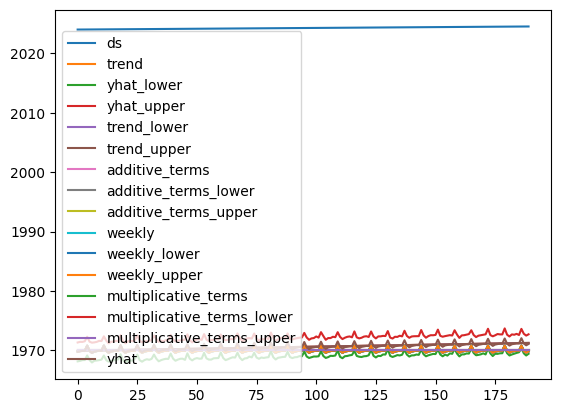

In [28]:
forecast.plot()

In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30).plot()

<Axes: >

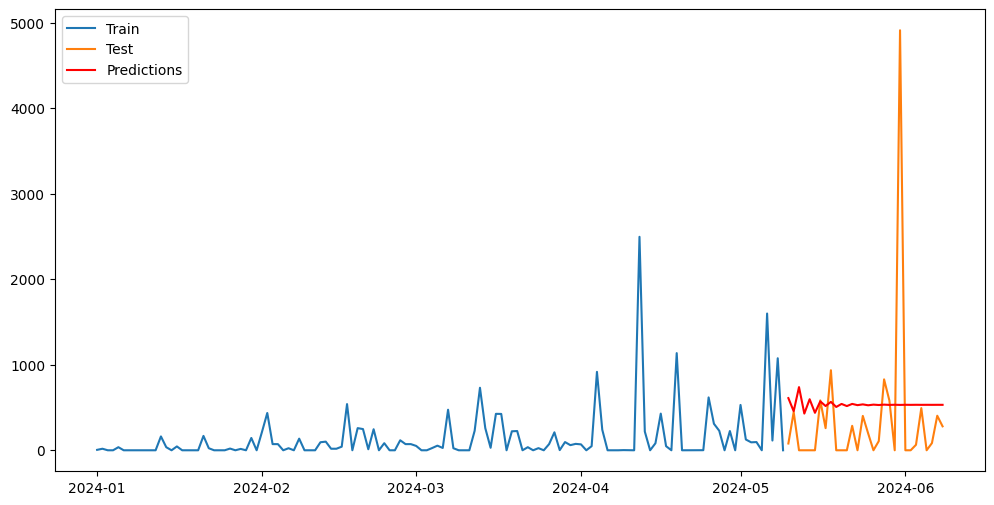

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
 
data_for_arima = daily_data_resampled.sum(axis=1)

train = data_for_arima[:-30]
test = data_for_arima[-30:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

predictions = model_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()
 

In [29]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

import tqdm as notebook_tqdm

In [30]:
df = pd.read_excel("orders.xlsx")

In [31]:
df

,Serial Number,Invoice Date,Product Name,Variant Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Party Company Name,Bill Date
0,INV/24-25/300,08 Jun 24,Baylink Offline Services,NaN,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,EMPROS FOOD AND BEVERAGES PRIVATE LIMITED,08 Jun 24
1,INV/24-25/299,08 Jun 24,Baylink Offline Services,NaN,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,ANISUE HEALTHCARE PRIVATE LIMITED,08 Jun 24
2,INV/24-25/298,08 Jun 24,Kerala Banana chips - Desi Masala- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,08 Jun 24,Kerala banana chips - Peri Peri- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,08 Jun 24,Kerala banana chips - Original Style- 85G,NaN,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...,...,...
3361,INV-12,05 Jan 24,Peach Iced Tea - Sachet,NaN,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,M/S ALFA SUPER MARKETS (YAS MART),05 Jan 24
3362,INV-11,02 Jan 24,Peach Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3363,INV-11,02 Jan 24,Lemon Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24
3364,INV-11,02 Jan 24,Wild Berries Iced Tea - Bottles,NaN,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",NaN,02 Jan 24


In [32]:
df.isna().sum()

Serial Number             0
Invoice Date              1
Product Name              1
Variant Name           3366
Created Date & Time       1
Qty                       0
Price with Tax            0
Item Total Amount         0
Party Name                1
Party Company Name     2078
Bill Date                 1
dtype: int64

In [33]:
df.drop(columns=['Variant Name','Party Company Name'],inplace=True)

In [34]:
df.isna().sum()

Serial Number          0
Invoice Date           1
Product Name           1
Created Date & Time    1
Qty                    0
Price with Tax         0
Item Total Amount      0
Party Name             1
Bill Date              1
dtype: int64

In [35]:
# remove that NA value from Invoice Date

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d %b %y')

In [37]:
df.isna().sum()

Serial Number          0
Invoice Date           1
Product Name           1
Created Date & Time    1
Qty                    0
Price with Tax         0
Item Total Amount      0
Party Name             1
Bill Date              1
dtype: int64

In [40]:
daily_data = df.groupby(['Invoice Date', 'Product Name'])['Qty'].sum().reset_index()

In [42]:
# shuffle the data 

daily_data = daily_data.sample(frac=1).reset_index(drop=True)

In [43]:
daily_data

,Invoice Date,Product Name,Qty
0,2024-02-01,Kerala Banana chips - Desi Masala- 85G,12.0
1,2024-06-04,Kerala banana chips - Original Style -30G,30.0
2,2024-02-27,Kerala Banana chips - Desi Masala- 85G,15.0
3,2024-02-16,Wild Berries Iced Tea - Bottles,12.0
4,2024-05-22,SILKY MOCHA,3.0
...,...,...,...
1220,2024-03-26,Frappe Cold Coffee,24.0
1221,2024-05-28,Kerala banana chips - Original Style -30G,40.0
1222,2024-02-19,Kerala Banana chips - Hot Sweet Chilli,6.0
1223,2024-04-26,Classic Cold Coffee,40.0


In [44]:
# get the unique Product Name from df 

products = df['Product Name'].unique()

In [46]:
len(products)

144

In [47]:
daily_data_pivot = daily_data.pivot(index='Invoice Date', columns='Product Name', values='Qty').fillna(0)

In [48]:
daily_data_pivot

Product Name,ACVSTRX Apple Cider Vinegar Tablets - Cranberry,ACVSTRX Apple Cider Vinegar Tablets - Green Apple,ACVSTRX Apple Cider Vinegar Tablets - Raspberry,Alpino Chocolate Peanut Butter Crunch 400 G,Alpino Chocolate Peanut Butter Smooth 400 G,Alpino Classic Peanut Butter Crunch 400 G,Alpino Classic Peanut Butter Smooth 400 G,Alpino High Protein Dark Chocolate Peanut Butter Crisp 500 G,Alpino High Protein Dark Chocolate Peanut Butter Smooth 500 G,Alpino High Protein Jaggery Peanut Butter Smooth 500 G,...,SILKY MOCHA,Sampling,Super Muesli Chocolate- 400GM,Super Muesli Fruits & Nuts- 400GM,Super Muesli Nut Delight- 400GM,Super Oats Chocolate Muesli- 1KG,Super Oats Chocolate Muesli- 400GM,Super Stix Salty- 170GM,Super Stix Sweet- 170GM,Wild Berries Iced Tea - Bottles
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
2024-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
daily_data_resampled = daily_data_pivot.resample('D').sum().fillna(0)

In [50]:
daily_data_resampled

Product Name,ACVSTRX Apple Cider Vinegar Tablets - Cranberry,ACVSTRX Apple Cider Vinegar Tablets - Green Apple,ACVSTRX Apple Cider Vinegar Tablets - Raspberry,Alpino Chocolate Peanut Butter Crunch 400 G,Alpino Chocolate Peanut Butter Smooth 400 G,Alpino Classic Peanut Butter Crunch 400 G,Alpino Classic Peanut Butter Smooth 400 G,Alpino High Protein Dark Chocolate Peanut Butter Crisp 500 G,Alpino High Protein Dark Chocolate Peanut Butter Smooth 500 G,Alpino High Protein Jaggery Peanut Butter Smooth 500 G,...,SILKY MOCHA,Sampling,Super Muesli Chocolate- 400GM,Super Muesli Fruits & Nuts- 400GM,Super Muesli Nut Delight- 400GM,Super Oats Chocolate Muesli- 1KG,Super Oats Chocolate Muesli- 400GM,Super Stix Salty- 170GM,Super Stix Sweet- 170GM,Wild Berries Iced Tea - Bottles
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data_for_prophet = daily_data_resampled.sum(axis=1).reset_index()
data_for_prophet.columns = ['ds', 'y']

In [52]:
data_for_prophet

,ds,y
0,2024-01-01,5.0
1,2024-01-02,18.0
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,36.0
...,...,...
155,2024-06-04,493.0
156,2024-06-05,0.0
157,2024-06-06,84.0
158,2024-06-07,404.0


In [53]:
model = Prophet()
model.fit(data_for_prophet)

future = model.make_future_dataframe(periods=30)

15:21:45 - cmdstanpy - INFO - Chain [1] start processing
15:21:45 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
forecast = model.predict(future)

/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ve

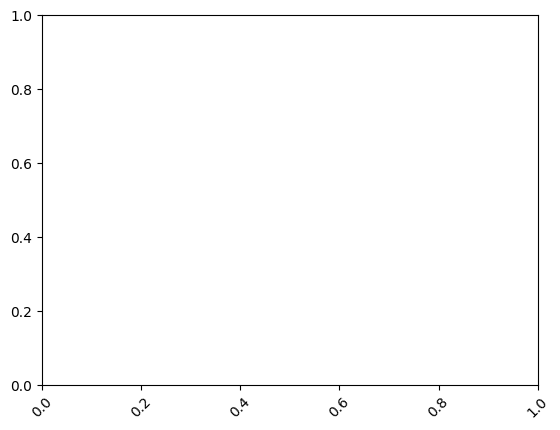

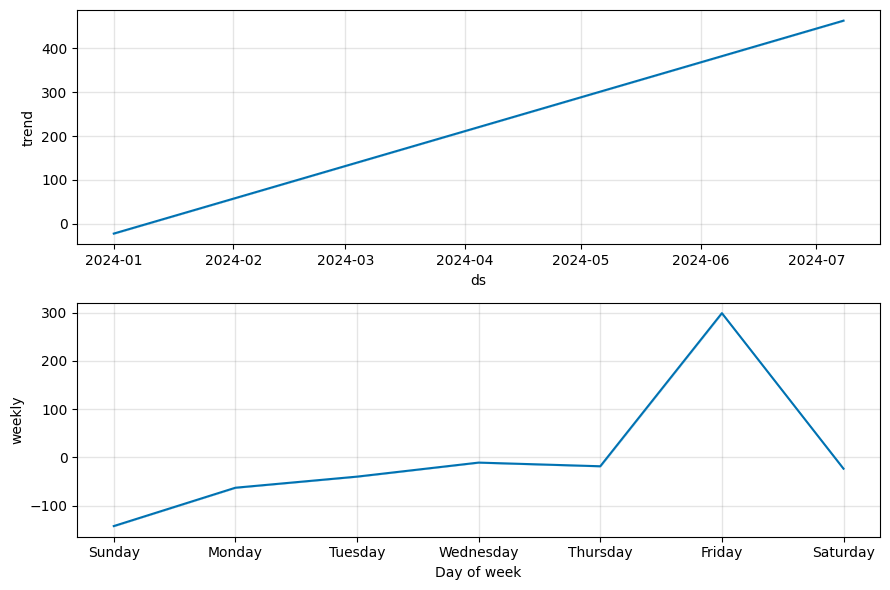

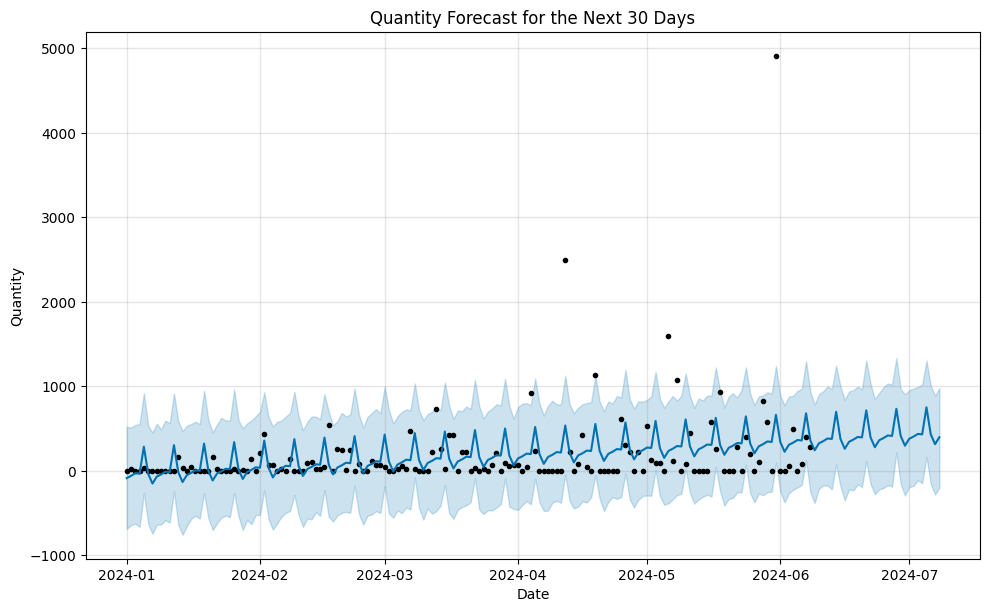

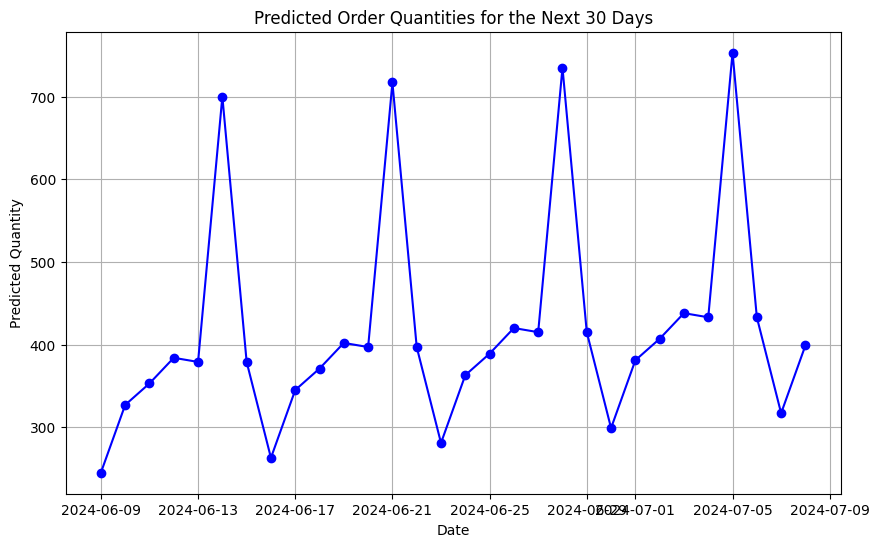

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

In [59]:

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat'].astype(int)

accuracy = model.plot_components(forecast)

fig1 = model.plot(forecast)
plt.title('Quantity Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Quantity')

next_30_days = forecast[['ds', 'yhat']].tail(30)

fig2, ax = plt.subplots(figsize=(10, 6))
ax.plot(next_30_days['ds'], next_30_days['yhat'], marker='o', linestyle='-', color='b')
ax.set_title('Predicted Order Quantities for the Next 30 Days')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted Quantity')
ax.grid(True)

plt.show()
plt.xticks(rotation=45)

In [60]:
sum_predicted_quantity = forecast['yhat'].tail(30).sum()
sum_predicted_quantity_int = int(sum_predicted_quantity)

sum_predicted_quantity_int


12537

299.0


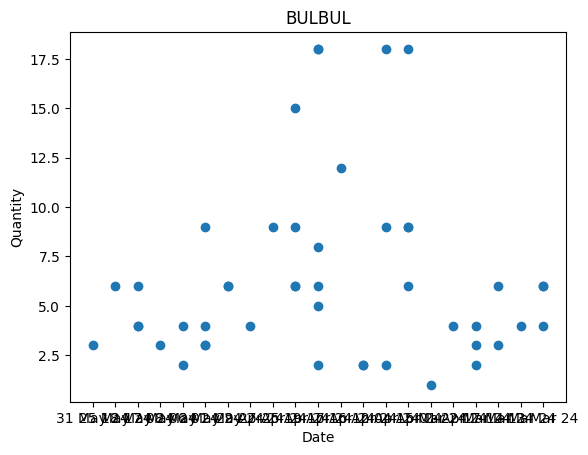

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from prophet import Prophet
import streamlit as st

df = pd.read_excel('orders.xlsx')

product_name = 'BULBUL'

p_ = df[df['Product Name'] == product_name]

print(p_.Qty.sum())

grouped_by_product = df.groupby('Product Name')
product_data = grouped_by_product.get_group(product_name)

plt.scatter(product_data['Invoice Date'], product_data['Qty'])
plt.title(product_name)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial Number        3366 non-null   object 
 1   Invoice Date         3365 non-null   object 
 2   Product Name         3365 non-null   object 
 3   Variant Name         0 non-null      float64
 4   Created Date & Time  3365 non-null   object 
 5   Qty                  3366 non-null   float64
 6   Price with Tax       3366 non-null   float64
 7   Item Total Amount    3366 non-null   float64
 8   Party Name           3365 non-null   object 
 9   Party Company Name   1288 non-null   object 
 10  Bill Date            3365 non-null   object 
dtypes: float64(4), object(7)
memory usage: 289.4+ KB


In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from statsmodels.tsa.arima.model import ARIMA

import tqdm as notebook_tqdm

In [2]:
df = pd.read_excel("orders.xlsx")

In [3]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d %b %y')

In [4]:
df.drop(columns=['Variant Name','Party Company Name'],inplace=True)

In [5]:
df

,Serial Number,Invoice Date,Product Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Bill Date
0,INV/24-25/300,2024-06-08,Baylink Offline Services,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,08 Jun 24
1,INV/24-25/299,2024-06-08,Baylink Offline Services,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,08 Jun 24
2,INV/24-25/298,2024-06-08,Kerala Banana chips - Desi Masala- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,2024-06-08,Kerala banana chips - Peri Peri- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,2024-06-08,Kerala banana chips - Original Style- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...
3361,INV-12,2024-01-05,Peach Iced Tea - Sachet,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,05 Jan 24
3362,INV-11,2024-01-02,Peach Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24
3363,INV-11,2024-01-02,Lemon Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24
3364,INV-11,2024-01-02,Wild Berries Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24


In [6]:
daily_data = df.groupby(['Invoice Date', 'Product Name'])['Qty'].sum().reset_index()

In [7]:
daily_data

,Invoice Date,Product Name,Qty
0,2024-01-01,Baylink Offline Services,5.0
1,2024-01-02,Lemon Iced Tea - Bottles,6.0
2,2024-01-02,Peach Iced Tea - Bottles,6.0
3,2024-01-02,Wild Berries Iced Tea - Bottles,6.0
4,2024-01-05,Lemon Iced Tea - Sachet,18.0
...,...,...,...
1220,2024-06-08,Kerala banana chips - Peri Peri - 30G,10.0
1221,2024-06-08,Kerala banana chips - Peri Peri- 85G,17.0
1222,2024-06-08,Kerala banana chips - Salt and Pepper - 30G,10.0
1223,2024-06-08,Kerala banana chips - Salt and Pepper- 85G,12.0


In [8]:
daily_data_pivot = daily_data.pivot(index='Invoice Date', columns='Product Name', values='Qty').fillna(0)

In [9]:
daily_data_pivot

Product Name,ACVSTRX Apple Cider Vinegar Tablets - Cranberry,ACVSTRX Apple Cider Vinegar Tablets - Green Apple,ACVSTRX Apple Cider Vinegar Tablets - Raspberry,Alpino Chocolate Peanut Butter Crunch 400 G,Alpino Chocolate Peanut Butter Smooth 400 G,Alpino Classic Peanut Butter Crunch 400 G,Alpino Classic Peanut Butter Smooth 400 G,Alpino High Protein Dark Chocolate Peanut Butter Crisp 500 G,Alpino High Protein Dark Chocolate Peanut Butter Smooth 500 G,Alpino High Protein Jaggery Peanut Butter Smooth 500 G,Alpino Natural Peanut Butter Crunch 400 G,Alpino Natural Peanut Butter Smooth 400 G,Alpino Nut Delight Super Muesli 400g,Alpino Organic Natural Peanut Butter Crunch 400 G,Alpino Organic Natural Peanut Butter Smooth 400 G,Alpino Peanut Butter Powder Dark Chocolate 400 G,Alpino Peanut Butter Super Oats Chocolate 400 G,Alpino Peanut Crackers Chipotle Honey 200g,Alpino Peanut Super Dip Sticks Salty 170 G,Alpino Peanut Super Dip Sticks Sweet 170 G,Alpino Super Chocolate Muesli Nuts & Cookies 400g,Alpino Super Muesli Fruit & Nuts 400 G,Alpino Super Muesli Nut Delight 400 G,BIOTIN - BLUEBERRY FLAVOUR,BRIGADEIRO,BULBUL,Baylink Margin,Baylink Offline Services,"Biotin Tablets -Vitamin B7 (Blueberry, 20 Tabs)",CREATIN 1500MG LEMONADE FLAVOUR,CREME CARAMEL,Chocolate Peanut Butter 400GM- Crisp,Chocolate Peanut Butter 400GM- Smooth,Classic Cold Coffee,Classic Peanut Butter 400GM- Crisp,Classic Peanut Butter 400GM- Smooth,"Creatine Monohydrate Tablets (Lemonade, 20 Tabs)",Dark Chocolate Peanut Butter 500 GM- Crisp,Dark Chocolate Peanut Butter 500 GM- Smooth,FOMO Hot Chocolate 100g,...,Original Anaar Masala Juice,Original Cummin Masala Juice,Original Jamun Masala Juice,Original Lemon Masala Juice,Paradyes Amethyst Plum,Paradyes Carola Pink Jar,Paradyes Chocolate Brown Jar,Paradyes Coffee Brown,Paradyes Cyan Skies,Paradyes Electric Purple Jar,Paradyes Hair Highlit Kit Amethyst Plum,Paradyes Hair Highlit Kit Carola Pink,Paradyes Hair Highlit Kit Chocolate Brown,Paradyes Hair Highlit Kit Honey Blonde,Paradyes Hair Highlit Kit Ruby Wine,Paradyes Honey Blonde Jar,Paradyes Local Lime Jar,Paradyes Mayeri Green Jar,Paradyes Ruby Wine,Paradyes Rudolphi Blue Jar,Paradyes Sapphire Navy,Paradyes Superba Aqua Jar,Peach Iced Tea - Bottles,Peach Iced Tea - Sachet,Peanut Butter Powder Dark Chocolate- 400GM,Peanut Crackers Smokey BBQ 200 G,Previous Dues,Protien Bar - Coffee Choco,Protien Bar - Double Choco,Protien Bar - Mix Berry,SILKY MOCHA,Sampling,Super Muesli Chocolate- 400GM,Super Muesli Fruits & Nuts- 400GM,Super Muesli Nut Delight- 400GM,Super Oats Chocolate Muesli- 1KG,Super Oats Chocolate Muesli- 400GM,Super Stix Salty- 170GM,Super Stix Sweet- 170GM,Wild Berries Iced Tea - Bottles
Invoice Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,

In [10]:
daily_data_resampled = daily_data_pivot.resample('D').sum().fillna(0)

In [11]:
daily_data_resampled

Product Name,ACVSTRX Apple Cider Vinegar Tablets - Cranberry,ACVSTRX Apple Cider Vinegar Tablets - Green Apple,ACVSTRX Apple Cider Vinegar Tablets - Raspberry,Alpino Chocolate Peanut Butter Crunch 400 G,Alpino Chocolate Peanut Butter Smooth 400 G,Alpino Classic Peanut Butter Crunch 400 G,Alpino Classic Peanut Butter Smooth 400 G,Alpino High Protein Dark Chocolate Peanut Butter Crisp 500 G,Alpino High Protein Dark Chocolate Peanut Butter Smooth 500 G,Alpino High Protein Jaggery Peanut Butter Smooth 500 G,Alpino Natural Peanut Butter Crunch 400 G,Alpino Natural Peanut Butter Smooth 400 G,Alpino Nut Delight Super Muesli 400g,Alpino Organic Natural Peanut Butter Crunch 400 G,Alpino Organic Natural Peanut Butter Smooth 400 G,Alpino Peanut Butter Powder Dark Chocolate 400 G,Alpino Peanut Butter Super Oats Chocolate 400 G,Alpino Peanut Crackers Chipotle Honey 200g,Alpino Peanut Super Dip Sticks Salty 170 G,Alpino Peanut Super Dip Sticks Sweet 170 G,Alpino Super Chocolate Muesli Nuts & Cookies 400g,Alpino Super Muesli Fruit & Nuts 400 G,Alpino Super Muesli Nut Delight 400 G,BIOTIN - BLUEBERRY FLAVOUR,BRIGADEIRO,BULBUL,Baylink Margin,Baylink Offline Services,"Biotin Tablets -Vitamin B7 (Blueberry, 20 Tabs)",CREATIN 1500MG LEMONADE FLAVOUR,CREME CARAMEL,Chocolate Peanut Butter 400GM- Crisp,Chocolate Peanut Butter 400GM- Smooth,Classic Cold Coffee,Classic Peanut Butter 400GM- Crisp,Classic Peanut Butter 400GM- Smooth,"Creatine Monohydrate Tablets (Lemonade, 20 Tabs)",Dark Chocolate Peanut Butter 500 GM- Crisp,Dark Chocolate Peanut Butter 500 GM- Smooth,FOMO Hot Chocolate 100g,...,Original Anaar Masala Juice,Original Cummin Masala Juice,Original Jamun Masala Juice,Original Lemon Masala Juice,Paradyes Amethyst Plum,Paradyes Carola Pink Jar,Paradyes Chocolate Brown Jar,Paradyes Coffee Brown,Paradyes Cyan Skies,Paradyes Electric Purple Jar,Paradyes Hair Highlit Kit Amethyst Plum,Paradyes Hair Highlit Kit Carola Pink,Paradyes Hair Highlit Kit Chocolate Brown,Paradyes Hair Highlit Kit Honey Blonde,Paradyes Hair Highlit Kit Ruby Wine,Paradyes Honey Blonde Jar,Paradyes Local Lime Jar,Paradyes Mayeri Green Jar,Paradyes Ruby Wine,Paradyes Rudolphi Blue Jar,Paradyes Sapphire Navy,Paradyes Superba Aqua Jar,Peach Iced Tea - Bottles,Peach Iced Tea - Sachet,Peanut Butter Powder Dark Chocolate- 400GM,Peanut Crackers Smokey BBQ 200 G,Previous Dues,Protien Bar - Coffee Choco,Protien Bar - Double Choco,Protien Bar - Mix Berry,SILKY MOCHA,Sampling,Super Muesli Chocolate- 400GM,Super Muesli Fruits & Nuts- 400GM,Super Muesli Nut Delight- 400GM,Super Oats Chocolate Muesli- 1KG,Super Oats Chocolate Muesli- 400GM,Super Stix Salty- 170GM,Super Stix Sweet- 170GM,Wild Berries Iced Tea - Bottles
Invoice Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2024-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0

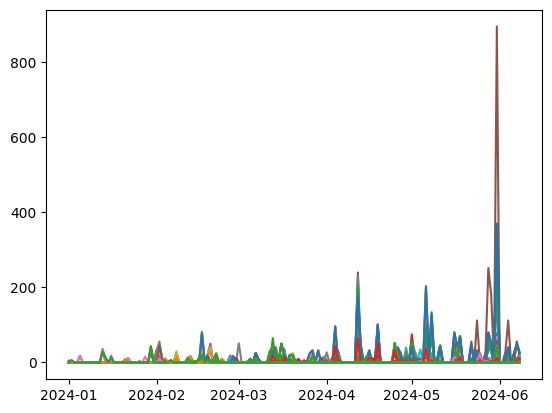

In [12]:
plt.plot(daily_data_resampled)

In [15]:
# ARIMA MODEL PREDICTION FOR NEXT 30 DAYS 

data_arima = daily_data_resampled.sum(axis=1).reset_index()

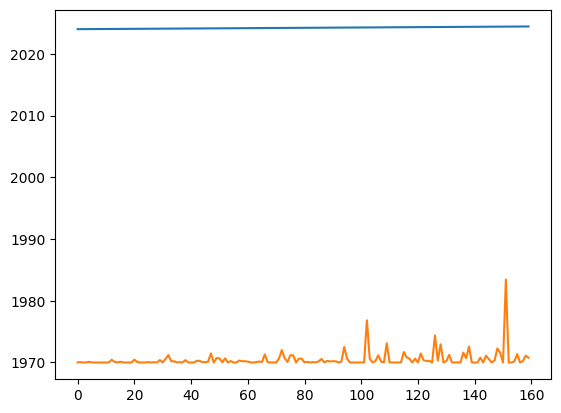

In [17]:
plt.plot(data_arima)

In [20]:
data_arima['Qty'] = data_arima[0].astype(int)

In [22]:
data_arima.drop(columns=[0],inplace=True)

In [23]:
data_arima

,Invoice Date,Qty
0,2024-01-01,5
1,2024-01-02,18
2,2024-01-03,0
3,2024-01-04,0
4,2024-01-05,36
...,...,...
155,2024-06-04,493
156,2024-06-05,0
157,2024-06-06,84
158,2024-06-07,404


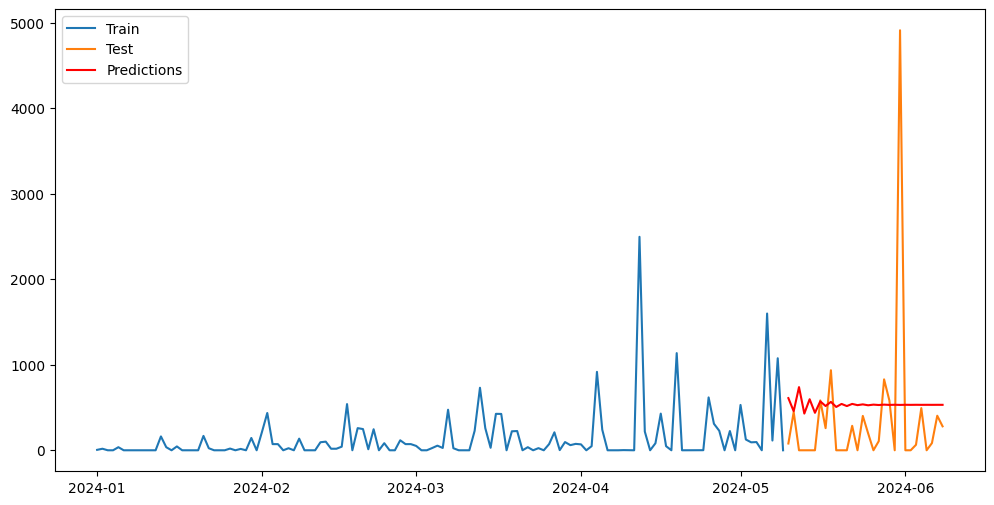

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
 
data_for_arima = daily_data_resampled.sum(axis=1)

train = data_for_arima[:-30]
test = data_for_arima[-30:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

predictions = model_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()
 

In [26]:
# sum of the orders quantity for next 30 days of preiction

sum_order_predicted_30_days = predictions.sum()
sum_order_predicted_30_days_int = int(sum_order_predicted_30_days)

sum_order_predicted_30_days_int

16064

In [30]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_excel("orders.xlsx")


df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d %b %y')
df.drop(columns=['Variant Name','Party Company Name'],inplace=True)

In [31]:
df

,Serial Number,Invoice Date,Product Name,Created Date & Time,Qty,Price with Tax,Item Total Amount,Party Name,Bill Date
0,INV/24-25/300,2024-06-08,Baylink Offline Services,08-06-2024 02:06 PM,1.0,3647.85,3647.85,FOMO Brews,08 Jun 24
1,INV/24-25/299,2024-06-08,Baylink Offline Services,08-06-2024 01:59 PM,8.0,1770.00,14160.00,Anisue,08 Jun 24
2,INV/24-25/298,2024-06-08,Kerala Banana chips - Desi Masala- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
3,INV/24-25/298,2024-06-08,Kerala banana chips - Peri Peri- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
4,INV/24-25/298,2024-06-08,Kerala banana chips - Original Style- 85G,08-06-2024 10:00 AM,5.0,45.00,225.00,SUPER VALUE STORE,08 Jun 24
...,...,...,...,...,...,...,...,...,...
3361,INV-12,2024-01-05,Peach Iced Tea - Sachet,04-01-2024 08:29 PM,18.0,28.00,504.00,ALFA SUPERMART - YASMART,05 Jan 24
3362,INV-11,2024-01-02,Peach Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24
3363,INV-11,2024-01-02,Lemon Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24
3364,INV-11,2024-01-02,Wild Berries Iced Tea - Bottles,02-01-2024 06:51 PM,6.0,60.00,360.00,"Manipal Stores , KMC Campus, Manipal, Udupi, K...",02 Jan 24


In [61]:
# group the df with product name and print only those whose count is more than 50


df = df.groupby('Product Name').filter(lambda x: len(x) > 40)

In [62]:
products = df['Product Name'].unique()


products

array(['Kerala Banana chips - Desi Masala- 85G',
       'Kerala banana chips - Peri Peri- 85G',
       'Kerala banana chips - Original Style- 85G', 'Frappe Cold Coffee',
       'Classic Cold Coffee', 'Mocha Cold Coffee',
       'Headshot Classic Energy Drink 250ml',
       'Kerala banana chips - Original Style -30G',
       'Kerala banana chips - Peri Peri - 30G',
       'Kerala banana chips - Salt and Pepper - 30G',
       'Kerala Banana Chips - Sour Cream Onion - 30G',
       'Kerala Banana chips - Desi Masala - 30G',
       'Kerala Banana chips - Hot Sweet Chilli - 30G',
       'FOMO Mango Peach Iced Tea 300ml', 'FOMO Iced Tea Peach 300ml',
       'FOMO Iced Tea Lemon 300ml', 'Protien Bar - Coffee Choco',
       'Protien Bar - Double Choco', 'Protien Bar - Mix Berry',
       'BRIGADEIRO ', 'SILKY MOCHA', 'CREME CARAMEL '], dtype=object)

In [69]:
product_models = {}
products = df['Product Name'].unique()

product = 'BULBUL'
 
product_data = df[df['Product Name'] == product]

daily_data = product_data.groupby(['Invoice Date','Product Name'])['Qty'].sum().reset_index()

daily_data_pivot = daily_data.pivot(index='Invoice Date', columns='Product Name', values='Qty').fillna(0)

daily_data_resampled = daily_data_pivot.resample('D').sum().fillna(0)

data_for_arima = daily_data_resampled.sum(axis=1)

train = data_for_arima[:-30]
test = data_for_arima[-30:]

model = ARIMA(train)
model_fit = model.fit()

predictions = model_fit.forecast(steps=30)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

print("Total orders predicted ::")
print(predictions.sum().round(0).astype(int))



ValueError: zero-size array to reduction operation maximum which has no identity

AttributeError: 'float' object has no attribute 'lower'

In [16]:
# product name which starts with B 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
file_path = 'orders.xlsx'
df = pd.read_excel(file_path)


products = df['Product Name'].unique().tolist()

for product in products:
    if product.startswith('F'):
        print(product)

Frappe Cold Coffee
FOMO Lemon Iced Tea PET 300 ML
FOMO Peach Iced Tea PET 300 ML
FOMO Mango Peach Iced Tea 300ml
FOMO Iced Tea Peach 300ml
FOMO Iced Tea Lemon 300ml
FOMO Masala Lemon Iced Tea 300ml 
FOMO Iced Tea Wild Berry 300ml
FOMO Lemon Iced Tea Premix 125ml
FOMO Peach Iced Tea Premix 125ml
FOMO Hot Chocolate 100g
FOMO Lemon Iced Tea
FOMO Peach Iced Tea


AttributeError: 'float' object has no attribute 'startswith'

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
file_path = 'orders.xlsx'
data = pd.read_excel(file_path)

# Convert 'Invoice Date' to datetime format
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Aggregate data by 'Invoice Date' and 'Product Name'
aggregated_data = data.groupby(['Invoice Date', 'Product Name'])['Qty'].sum().reset_index()

# Select a specific product
product_name = 'Kerala Banana chips - Desi Masala- 85G'

# Filter the data for the selected product
product_data = aggregated_data[aggregated_data['Product Name'] == product_name]

# Prepare the data for LSTM
product_data.set_index('Invoice Date', inplace=True)
product_data = product_data['Qty'].resample('D').sum().fillna(0)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(product_data.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Split the data into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=2)

# Predict the values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
train = product_data[:split + seq_length]
valid = product_data[split + seq_length:]
valid = pd.DataFrame(valid)
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.plot(train.index, train.values, label='Training Data')
plt.plot(valid.index, valid['Qty'], label='Validation Data')
plt.plot(valid.index, valid['Predictions'], label='Predictions')
plt.legend()
plt.show()

# Predict for the next 30 days
last_sequence = scaled_data[-seq_length:]
future_predictions = []
current_sequence = last_sequence

for _ in range(30):
    pred = model.predict(current_sequence[np.newaxis, :, :])
    future_predictions.append(pred[0, 0])
    current_sequence = np.append(current_sequence[1:], pred, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a date range for the next 30 days
last_date = product_data.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30)

# Create a dataframe to display future predictions
future_df = pd.DataFrame(data={'Date': future_dates, 'Predicted Quantity': future_predictions.flatten()})
print(future_df)

# Plot future predictions
plt.figure(figsize=(16, 8))
plt.title('Future Predictions for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Quantity')
plt.plot(future_df['Date'], future_df['Predicted Quantity'], marker='o')
plt.show()

future_predictions = future_predictions.flatten().astype(int)

print(future_predictions.sum().round(0).astype(int))


Epoch 1/2


/var/folders/xb/cxdjn0ss0jqf_myqq0h4fgm80000gn/T/ipykernel_2860/3473259017.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# LSTM

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
file_path = 'orders.xlsx'
data = pd.read_excel(file_path)

products_model = {}

# Convert 'Invoice Date' to datetime format
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])

# Aggregate data by 'Invoice Date' and 'Product Name'
aggregated_data = data.groupby(['Invoice Date', 'Product Name'])['Qty'].sum().reset_index()

# all_products = aggregated_data['Product Name'].unique()

all_products = ['BULBUL']

try:

  # Select a specific product
  for product_name in all_products: 
    # Filter the data for the selected product
    product_data = aggregated_data[aggregated_data['Product Name'] == product_name]

    # Prepare the data for LSTM
    product_data.set_index('Invoice Date', inplace=True)
    product_data = product_data['Qty'].resample('D').sum().fillna(0)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(product_data.values.reshape(-1, 1))

    # Create sequences
    def create_sequences(data, seq_length):
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i:i + seq_length]
            y = data[i + seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)

    seq_length = 30
    X, y = create_sequences(scaled_data, seq_length)

    # Split the data into training and test sets
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=10) 
 
    # Predict the values
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)

    # Plot the results
    train = product_data[:split + seq_length]
    valid = product_data[split + seq_length:]
    valid = pd.DataFrame(valid)
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 8))
    plt.title('LSTM Model')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.plot(train.index, train.values, label='Training Data')
    plt.plot(valid.index, valid['Qty'], label='Validation Data')
    plt.plot(valid.index, valid['Predictions'], label='Predictions')
    plt.legend()
    plt.show()
    

    # Predict for the next 30 days
    last_sequence = scaled_data[-seq_length:]
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(30):
        pred = model.predict(current_sequence[np.newaxis, :, :])
        future_predictions.append(pred[0, 0]) 

    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Create a date range for the next 30 days
    last_date = product_data.index[-1]
    future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30)

    # Create a dataframe to display future predictions
    future_df = pd.DataFrame(data={'Date': future_dates, 'Predicted Quantity': future_predictions.flatten()})
    print(future_df)

    # Plot future predictions
    plt.figure(figsize=(16, 8))
    plt.title('Future Predictions for the Next 30 Days')
    plt.xlabel('Date')
    plt.ylabel('Predicted Quantity')
    plt.plot(future_df['Date'], future_df['Predicted Quantity'], marker='o')
    plt.show()
    

    future_predictions = future_predictions.flatten().astype(int)

    print(future_predictions.sum().round(0).astype(int),"for product",product_name)

except Exception as e:
  print(e) 

Epoch 1/10


/var/folders/xb/cxdjn0ss0jqf_myqq0h4fgm80000gn/T/ipykernel_2972/2786427713.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
/Users/lazycodebaker/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import  AutoReg
from matplotlib import  pyplot


orders = pd.read_excel('orders.xlsx' )

In [24]:
orders['Invoice Date'] = pd.to_datetime(orders['Invoice Date'], format='%d %b %y')

In [25]:
orders = orders[['Invoice Date','Product Name','Qty']]

In [26]:
orders

,Invoice Date,Product Name,Qty
0,2024-06-08,Baylink Offline Services,1.0
1,2024-06-08,Baylink Offline Services,8.0
2,2024-06-08,Kerala Banana chips - Desi Masala- 85G,5.0
3,2024-06-08,Kerala banana chips - Peri Peri- 85G,5.0
4,2024-06-08,Kerala banana chips - Original Style- 85G,5.0
...,...,...,...
3361,2024-01-05,Peach Iced Tea - Sachet,18.0
3362,2024-01-02,Peach Iced Tea - Bottles,6.0
3363,2024-01-02,Lemon Iced Tea - Bottles,6.0
3364,2024-01-02,Wild Berries Iced Tea - Bottles,6.0


<Axes: >

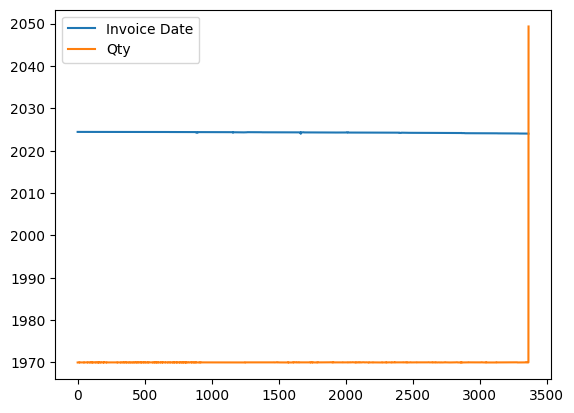

In [28]:
orders.plot()

In [32]:
# get proeuct name with max qty 
orders.groupby('Product Name')['Qty'].sum().reset_index().sort_values('Qty',ascending=False).head(10)

,Product Name,Qty
90,Mocha Cold Coffee,2249.0
33,Classic Cold Coffee,2244.0
51,Frappe Cold Coffee,2215.0
55,Headshot Classic Energy Drink 250ml,1744.0
73,Kerala banana chips - Original Style -30G,1632.0
65,Kerala Banana chips - Desi Masala - 30G,1606.0
77,Kerala banana chips - Peri Peri - 30G,1597.0
69,Kerala Banana chips - Hot Sweet Chilli - 30G,1526.0
61,Kerala Banana Chips - Sour Cream Onion - 30G,1487.0
82,Kerala banana chips - Salt and Pepper - 30G,1484.0


<Axes: xlabel='Invoice Date'>

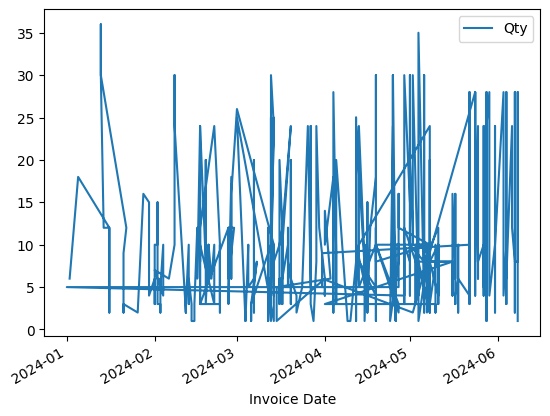

In [29]:
orders.plot(x='Invoice Date',y='Qty')

In [35]:
test_product_name = 'Mocha Cold Coffee'

mocha_orders = orders[orders['Product Name'] == test_product_name].groupby('Invoice Date')['Qty'].sum().reset_index()

In [38]:
mocha_orders = orders[orders['Product Name'] == test_product_name].groupby('Invoice Date')['Qty'].sum().reset_index()

<Axes: xlabel='Invoice Date'>

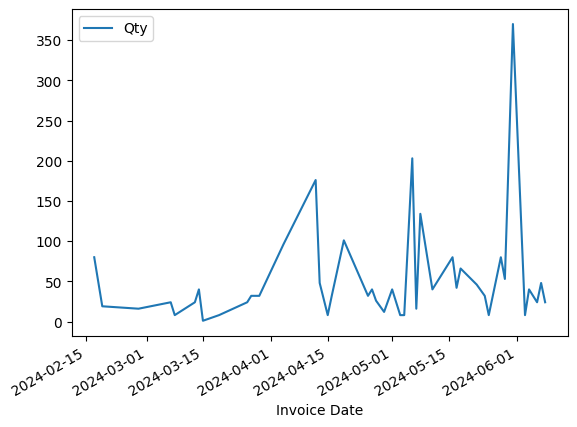

In [39]:
mocha_orders.plot(x='Invoice Date',y='Qty')

<Axes: >

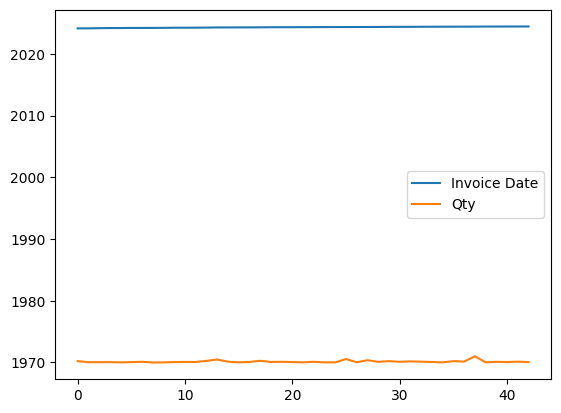

In [40]:
mocha_orders.plot()

In [41]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(mocha_orders['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.788123
p-value: 0.000000
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605


In [45]:
mocha_orders.shape

(43, 2)

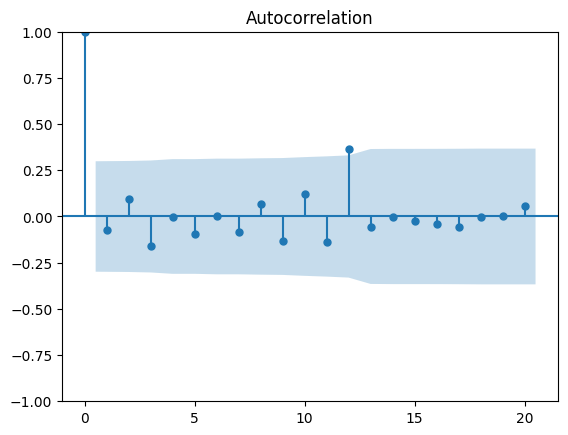

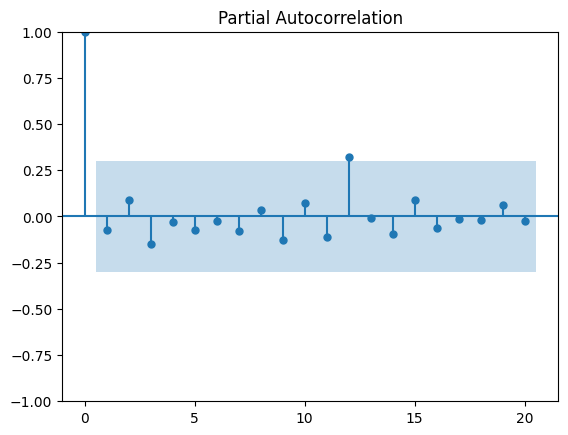

In [46]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_acf(mocha_orders['Qty'],lags=20)
plot_pacf(mocha_orders['Qty'],lags=20)
plt.show()

In [51]:
model = AutoReg(mocha_orders['Qty'], lags=20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    Qty   No. Observations:                   43
Model:                    AutoReg(20)   Log Likelihood                -115.019
Method:               Conditional MLE   S.D. of innovations             35.941
Date:                Sat, 29 Jun 2024   AIC                            274.037
Time:                        14:09:12   BIC                            299.018
Sample:                            20   HQIC                           280.320
                                   43                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -103.6312     95.530     -1.085      0.278    -290.866      83.604
Qty.L1         0.1173      0.196      0.598      0.550      -0.267       0.502
Qty.L2        -0.3823      0.196     -1.954      0.051      -0.766       0.001
Qty.L3        -0.2945      0.172     -1.712      0.087      -0.632       0.043
Qty.L4        -0.2933      0.237     -1.239      0.215      -0.757       0.171
Qty.L5        -0.1301      0.263     -0.495      0.621      -0.646       0.385
Qty.L6        -0.4828      0.342     -1.410      0.159      -1.154       0.188
Qty.L7        -0.2163      0.281     -0.770      0.442      -0.767       0.334
Qty.L8         0.3679      0.277      1.329      0.184      -0.175       0.911
Qty.L9         0.2807      0.237      1.185      0.236      -0.184       0.745
Qty.L10        0.5771      0.229      2.525      0.012       0.129       1.025
Qty.L11       -0.0204      0.225     -0.091      0.928      -0.461       0.420
Qty.L12        1.2763      0.211      6.050      0.000       0.863       1.690
Qty.L13       -0.1549      0.303     -0.511      0.609      -0.749       0.439
Qty.L14        0.4733      0.303      1.563      0.118      -0.120       1.067
Qty.L15        0.5217      0.259      2.011      0.044       0.013       1.030
Qty.L16        0.2399      0.421      0.570      0.568      -0.584       1.064
Qty.L17        0.1684      0.456      0.369      0.712      -0.725       1.062
Qty.L18        0.7992      0.461      1.734      0.083      -0.104       1.703
Qty.L19        0.3713      0.407      0.913      0.361      -0.426       1.168
Qty.L20        0.5914      0.407      1.454      0.146      -0.206       1.389
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9379           -0.0000j            0.9379           -0.0000
AR.2             0.7178           -0.5723j            0.9180           -0.1071
AR.3             0.7178           +0.5723j            0.9180            0.1071
AR.4             0.9455           -0.4534j            1.0486           -0.0712
AR.5             0.9455           +0.4534j            1.0486            0.0712
AR.6             0.5538           -0.8537j            1.0175           -0.1584
AR.7             0.5538           +0.8537j            1.0175            0.1584
AR.8             0.2296           -0.9804j            1.0069           -0.2134
AR.9             0.2296           +0.9804j            1.0069            0.2134
AR.10            0.0071           -0.9832j            0.9833           -0.2489
AR.11            0.0071           +0.9832j            0.9833            0.2489
AR.12           -0.9469           -0.0000j            0.9469           -0.5000
AR.13           -0.7960           -0.5424j            0.9632           -0.4048
AR

In [70]:
prediction = model.predict(start=mocha_orders.shape[0],end=mocha_orders.shape[0]+42,dynamic=False) # for next 30 days
prediction

43      61.344564
44      65.189541
45     378.143699
46     176.154872
47     254.132101
48     -99.686686
49     265.859010
50    -106.325031
51     -71.185339
52      26.729020
53     188.736889
54     322.782120
55     625.417578
56     212.283299
57     581.886308
58    -162.995183
59     -30.955839
60    -442.311077
61     127.260272
62     116.027121
63     576.897741
64     877.039782
65    1129.641399
66     402.744690
67     519.878334
68    -848.089400
69     -76.637760
70    -761.115664
71     168.474656
72     687.906454
73    1961.794433
74    1858.234679
75    1796.659732
76     273.706451
77      -7.542751
78   -2065.807000
79    -796.470048
80   -1374.728588
81    1860.877311
82    2769.914551
83    4278.613856
84    3530.049163
85    2547.772156
dtype: float64

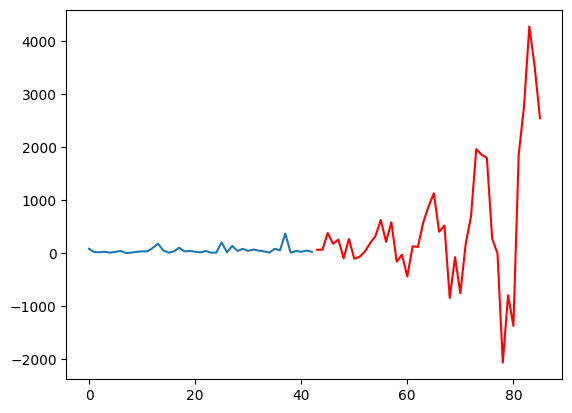

In [71]:
from matplotlib import pyplot

pyplot.plot(mocha_orders['Qty'])
pyplot.plot(prediction, color='red')
pyplot.show()

In [75]:
# sum the predicted orders qty 
sum_next_orders = prediction.sum()
sum_next_orders_int = int(sum_next_orders)

sum_next_orders_int 

21798

In [76]:
mocha_orders

,Invoice Date,Qty
0,2024-02-17,80.0
1,2024-02-19,19.0
2,2024-02-28,16.0
3,2024-03-07,24.0
4,2024-03-08,8.0
5,2024-03-13,24.0
6,2024-03-14,40.0
7,2024-03-15,1.0
8,2024-03-19,8.0
9,2024-03-26,24.0


In [77]:
# impoer arima model 
from statsmodels.tsa.arima.model import ARIMA

In [100]:
arima_model = ARIMA(mocha_orders['Qty'],order=(1,0,5)).fit()
arima_model.summary()

/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                   43
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -239.421
Date:                Sat, 29 Jun 2024   AIC                            494.842
Time:                        14:20:24   BIC                            508.931
Sample:                             0   HQIC                           500.037
                                 - 43                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9930     17.643      3.004      0.003      18.413      87.573
ar.L1          0.8611      0.534      1.612      0.107      -0.186       1.908
ma.L1         -0.9594      5.245     -0.183      0.855     -11.239       9.321
ma.L2          0.1175      0.428      0.275      0.783      -0.720       0.955
ma.L3         -0.2222      1.001     -0.222      0.824      -2.183       1.739
ma.L4          0.1158      0.789      0.147      0.883      -1.431       1.663
ma.L5         -0.0488      0.700     -0.070      0.944      -1.421       1.324
sigma2      3892.2923   1.92e+04      0.203      0.839   -3.36e+04    4.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               334.80
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                             3.16
Prob(H) (two-sided):                  0.03   Kurtosis:                        15.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
from pmdarima import auto_arima 

stepwuse_fit = auto_arima(mocha_orders['Qty'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
stepwuse_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=349.727, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=343.165, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=344.474, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=345.203, Time=0.03 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=339.858, Time=0.17 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=348.808, Time=0.10 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=341.470, Time=0.24 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.15 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   43
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -164.929
Date:                              Sat, 29 Jun 2024   AIC                            339.858
Time:                                      14:19:24   BIC                            346.864
Sample:                                           0   HQIC                           342.099
                                               - 43                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6545      0.136     -4.796      0.000      -0.922      -0.387
ar.S.L12      -0.4028      0.383     -1.053      0.292      -1.153       0.347
ar.S.L24       0.5927      0.347      1.708      0.088      -0.088       1.273
ma.S.L12       0.8134      0.854      0.952      0.341      -0.861       2.488
sigma2      1219.4656      0.001   1.46e+06      0.000    1219.464    1219.467
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.64   Prob(JB):                         0.82
Heteroskedasticity (H):               1.38   Skew:                            -0.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  3e+22. Standard errors may be unstable.
"""

In [102]:
arima_prediction = arima_model.predict(start=mocha_orders.shape[0],end=mocha_orders.shape[0]+30,dynamic=False) # for next 30 days
arima_prediction

43    34.973608
44    39.013081
45    43.607498
46    43.066898
47    45.156503
48    46.245320
49    47.182855
50    47.990127
51    48.685235
52    49.283763
53    49.799131
54    50.242892
55    50.624996
56    50.954010
57    51.237310
58    51.481248
59    51.691293
60    51.872154
61    52.027885
62    52.161979
63    52.277442
64    52.376862
65    52.462468
66    52.536180
67    52.599651
68    52.654302
69    52.701361
70    52.741881
71    52.776771
72    52.806813
73    52.832681
Name: predicted_mean, dtype: float64

<Axes: >

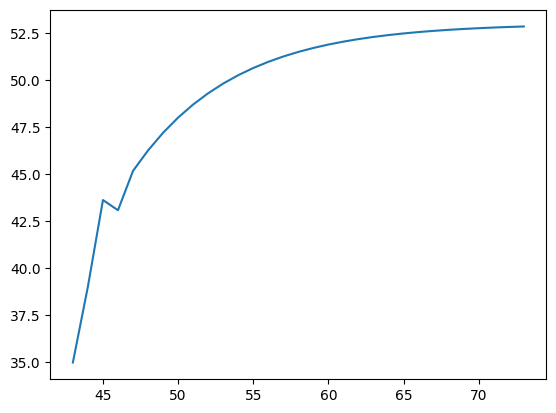

In [110]:
arima_prediction.plot()


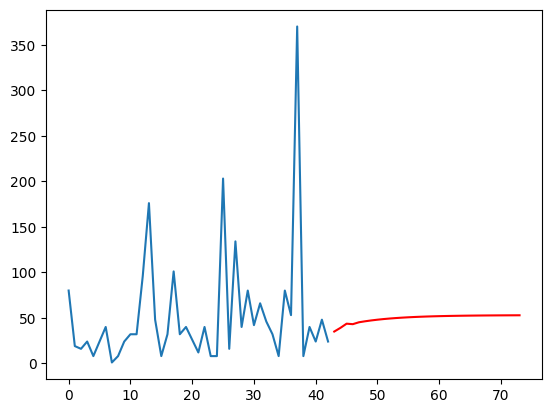

In [104]:
from matplotlib import pyplot

pyplot.plot(mocha_orders['Qty'])
pyplot.plot(arima_prediction, color='red')
pyplot.show()

In [108]:
sum_arima_orders = arima_prediction.sum()
int(sum_arima_orders)

1536

In [115]:
mocha_orders.set_index('Invoice Date',inplace=True)

In [117]:
mocha_orders.drop(columns='index',inplace=True)

In [119]:
mocha_orders.reset_index(inplace=True)

In [120]:
mocha_orders

,Invoice Date,Qty
0,2024-02-17,80.0
1,2024-02-19,19.0
2,2024-02-28,16.0
3,2024-03-07,24.0
4,2024-03-08,8.0
5,2024-03-13,24.0
6,2024-03-14,40.0
7,2024-03-15,1.0
8,2024-03-19,8.0
9,2024-03-26,24.0


In [138]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = mocha_orders[['Invoice Date']]
y = mocha_orders[['Qty']]

lr.fit(X,y) 

lr.predict(X)

UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=1,max_features=3)

rf.fit(mocha_orders[['Qty']],mocha_orders[['Invoice Date']])
predicted_rf = rf.predict(mocha_orders[['Qty']])

/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


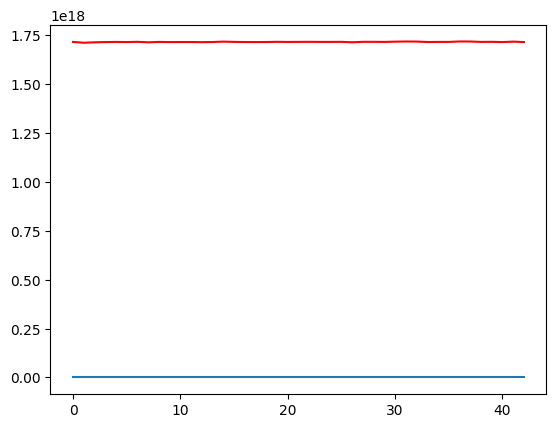

In [137]:
from matplotlib import pyplot
pyplot.plot(mocha_orders['Qty'])
pyplot.plot(predicted_rf, color='red')
pyplot.show()

In [203]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import  AutoReg
from matplotlib import  pyplot


orders = pd.read_excel('orders.xlsx',index_col='Invoice Date',parse_dates=True)


product_name = 'Mocha Cold Coffee'

orders = orders[orders['Product Name'] == product_name].groupby('Invoice Date').sum()
# drop all columns except qty and invoice date 

mocha_orders  = orders[['Qty']]

/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_9345/3276595859.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders = pd.read_excel('orders.xlsx',index_col='Invoice Date',parse_dates=True)


In [204]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [205]:
mocha_orders 

,Qty
Invoice Date,
2024-02-17,80.0
2024-02-19,19.0
2024-02-28,16.0
2024-03-07,24.0
2024-03-08,8.0
2024-03-13,24.0
2024-03-14,40.0
2024-03-15,1.0
2024-03-19,8.0


<Axes: xlabel='Invoice Date'>

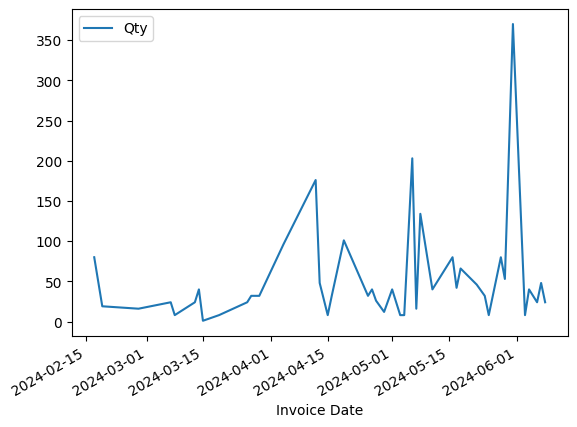

In [206]:
mocha_orders.plot()

In [215]:
# convert index to datetime 
mocha_orders.index = pd.to_datetime(mocha_orders.index)

In [216]:
mocha_orders

,Qty
Invoice Date,
2024-02-17,80.0
2024-02-19,19.0
2024-02-28,16.0
2024-03-07,24.0
2024-03-08,8.0
2024-03-13,24.0
2024-03-14,40.0
2024-03-15,1.0
2024-03-19,8.0


In [217]:
results = seasonal_decompose(mocha_orders['Qty'])

results.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [218]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mocha_orders)

mocha_orders_scaled = scaler.transform(mocha_orders)

In [222]:
!pip3 install keras

7217.29s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [223]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [224]:
generator = TimeseriesGenerator(mocha_orders_scaled, mocha_orders_scaled, length=3, batch_size=1)

X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')

Given the Array: 
[0.21409214 0.04878049 0.04065041]


In [226]:
X.shape

(1, 3, 1)

In [225]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [227]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
model.fit(generator,epochs=50)

Epoch 1/50


In [1]:
mocha_orders

NameError: name 'mocha_orders' is not defined

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import  AutoReg
from matplotlib import  pyplot


orders = pd.read_excel('orders.xlsx',index_col='Invoice Date',parse_dates=True)


product_name = 'Mocha Cold Coffee'

orders = orders[orders['Product Name'] == product_name].groupby('Invoice Date').sum()
# drop all columns except qty and invoice date 

mocha_orders  = orders[['Qty']]

/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_14356/3276595859.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders = pd.read_excel('orders.xlsx',index_col='Invoice Date',parse_dates=True)


In [20]:
mocha_orders

,Qty
Invoice Date,
2024-02-17,80.0
2024-02-19,19.0
2024-02-28,16.0
2024-03-07,24.0
2024-03-08,8.0
2024-03-13,24.0
2024-03-14,40.0
2024-03-15,1.0
2024-03-19,8.0


In [21]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
 

In [22]:
mocha_orders.reset_index(inplace=True)

mocha_orders

,Invoice Date,Qty
0,2024-02-17,80.0
1,2024-02-19,19.0
2,2024-02-28,16.0
3,2024-03-07,24.0
4,2024-03-08,8.0
5,2024-03-13,24.0
6,2024-03-14,40.0
7,2024-03-15,1.0
8,2024-03-19,8.0
9,2024-03-26,24.0


In [23]:
mocha_orders.columns = ['ds','y']
mocha_orders

,ds,y
0,2024-02-17,80.0
1,2024-02-19,19.0
2,2024-02-28,16.0
3,2024-03-07,24.0
4,2024-03-08,8.0
5,2024-03-13,24.0
6,2024-03-14,40.0
7,2024-03-15,1.0
8,2024-03-19,8.0
9,2024-03-26,24.0


In [24]:
mocha_orders['ds'] = pd.to_datetime(mocha_orders['ds'])

mocha_orders

/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_14356/1146044442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mocha_orders['ds'] = pd.to_datetime(mocha_orders['ds'])


,ds,y
0,2024-02-17,80.0
1,2024-02-19,19.0
2,2024-02-28,16.0
3,2024-03-07,24.0
4,2024-03-08,8.0
5,2024-03-13,24.0
6,2024-03-14,40.0
7,2024-03-15,1.0
8,2024-03-19,8.0
9,2024-03-26,24.0


<Axes: xlabel='ds'>

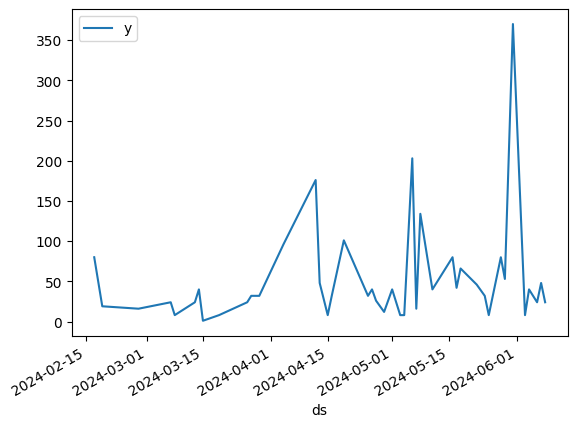

In [25]:
mocha_orders.plot(x='ds',y='y')

In [26]:
mocha_orders.shape

(43, 2)

In [27]:
model_prophet = Prophet(
    changepoint_prior_scale=0.15,
    seasonality_mode='multiplicative',
    weekly_seasonality=True,
    daily_seasonality=True,
    yearly_seasonality=False
)
model_prophet.fit(mocha_orders)

future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)
forecast

19:14:52 - cmdstanpy - INFO - Chain [1] start processing
19:14:52 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2024-02-17,6.148290,-73.786424,82.105530,6.148290,6.148290,0.948936,0.948936,0.948936,0.095666,0.095666,0.095666,-0.853270,-0.853270,-0.853270,0.0,0.0,0.0,6.736471
1,2024-02-19,6.699905,-64.951754,87.090191,6.699905,6.699905,0.948936,0.948936,0.948936,1.011957,1.011957,1.011957,0.063021,0.063021,0.063021,0.0,0.0,0.0,13.479920
2,2024-02-28,9.182176,-54.623472,94.611199,9.182176,9.182176,0.948936,0.948936,0.948936,1.144261,1.144261,1.144261,0.195325,0.195325,0.195325,0.0,0.0,0.0,19.688977
3,2024-03-07,11.388638,-56.395615,100.413981,11.388638,11.388638,0.948936,0.948936,0.948936,0.898312,0.898312,0.898312,-0.050624,-0.050624,-0.050624,0.0,0.0,0.0,21.619189
4,2024-03-08,11.664446,-39.358053,110.406224,11.664446,11.664446,0.948936,0.948936,0.948936,2.283778,2.283778,2.283778,1.334842,1.334842,1.334842,0.0,0.0,0.0,38.303448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-07-04,44.189645,9.067696,161.359862,44.189013,44.190296,0.948936,0.948936,0.948936,0.898312,0.898312,0.898312,-0.050624,-0.050624,-0.050624,0.0,0.0,0.0,83.885734
69,2024-07-05,44.465211,72.683392,226.915845,44.464535,44.465907,0.948936,0.948936,0.948936,2.283778,2.283778,2.283778,1.334842,1.334842,1.334842,0.0,0.0,0.0,146.013868
70,2024-07-06,44.740776,-25.235718,126.208969,44.740069,44.741508,0.948936,0.948936,0.948936,0.095666,0.095666,0.095666,-0.853270,-0.853270,-0.853270,0.0,0.0,0.0,49.020935
71,2024-07-07,45.016341,1.307768,158.170813,45.015588,45.017121,0.948936,0.948936,0.948936,0.830319,0.830319,0.830319,-0.118617,-0.118617,-0.118617,0.0,0.0,0.0,82.394281


In [28]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-02-17,6.736471,-73.786424,82.105530
1,2024-02-19,13.479920,-64.951754,87.090191
2,2024-02-28,19.688977,-54.623472,94.611199
3,2024-03-07,21.619189,-56.395615,100.413981
4,2024-03-08,38.303448,-39.358053,110.406224
...,...,...,...,...
68,2024-07-04,83.885734,9.067696,161.359862
69,2024-07-05,146.013868,72.683392,226.915845
70,2024-07-06,49.020935,-25.235718,126.208969
71,2024-07-07,82.394281,1.307768,158.170813


<Axes: xlabel='ds'>

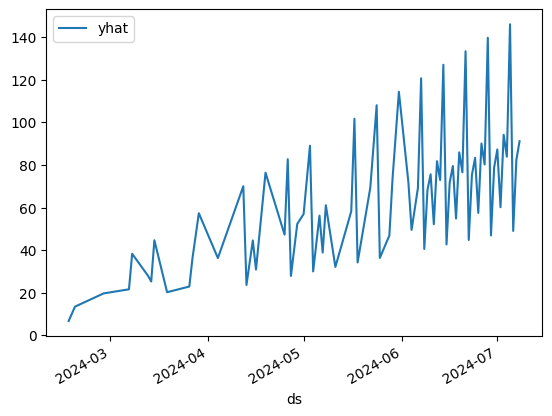

In [29]:
from prophet.plot import plot_plotly
import plotly.graph_objects as go 


forecast.plot(x='ds',y='yhat')

In [13]:
sum_of_orders_next_30_days = int(forecast['yhat'].tail(30).sum())

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2024-02-17,6.148290,-73.786424,82.105530,6.148290,6.148290,0.948936,0.948936,0.948936,0.095666,0.095666,0.095666,-0.853270,-0.853270,-0.853270,0.0,0.0,0.0,6.736471
1,2024-02-19,6.699905,-64.951754,87.090191,6.699905,6.699905,0.948936,0.948936,0.948936,1.011957,1.011957,1.011957,0.063021,0.063021,0.063021,0.0,0.0,0.0,13.479920
2,2024-02-28,9.182176,-54.623472,94.611199,9.182176,9.182176,0.948936,0.948936,0.948936,1.144261,1.144261,1.144261,0.195325,0.195325,0.195325,0.0,0.0,0.0,19.688977
3,2024-03-07,11.388638,-56.395615,100.413981,11.388638,11.388638,0.948936,0.948936,0.948936,0.898312,0.898312,0.898312,-0.050624,-0.050624,-0.050624,0.0,0.0,0.0,21.619189
4,2024-03-08,11.664446,-39.358053,110.406224,11.664446,11.664446,0.948936,0.948936,0.948936,2.283778,2.283778,2.283778,1.334842,1.334842,1.334842,0.0,0.0,0.0,38.303448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-07-04,44.189645,9.067696,161.359862,44.189013,44.190296,0.948936,0.948936,0.948936,0.898312,0.898312,0.898312,-0.050624,-0.050624,-0.050624,0.0,0.0,0.0,83.885734
69,2024-07-05,44.465211,72.683392,226.915845,44.464535,44.465907,0.948936,0.948936,0.948936,2.283778,2.283778,2.283778,1.334842,1.334842,1.334842,0.0,0.0,0.0,146.013868
70,2024-07-06,44.740776,-25.235718,126.208969,44.740069,44.741508,0.948936,0.948936,0.948936,0.095666,0.095666,0.095666,-0.853270,-0.853270,-0.853270,0.0,0.0,0.0,49.020935
71,2024-07-07,45.016341,1.307768,158.170813,45.015588,45.017121,0.948936,0.948936,0.948936,0.830319,0.830319,0.830319,-0.118617,-0.118617,-0.118617,0.0,0.0,0.0,82.394281


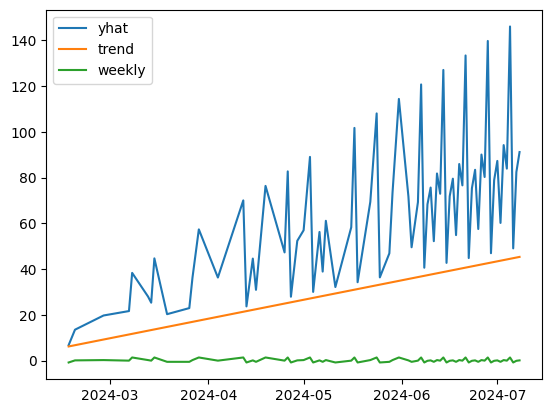

In [42]:
# plot trend , y_hat , daily , weekly 
ds = forecast['ds']
yhat = forecast['yhat']
trend = forecast['trend']
weekly = forecast['weekly']

import matplotlib.pyplot as plt 


plt.plot(ds,yhat)
plt.plot(ds,trend)
plt.plot(ds,weekly) 

plt.legend(['yhat','trend','weekly'])


In [14]:
# group the mocha_orders monthwise 
mocha_orders['month'] = mocha_orders['ds'].dt.month
mocha_orders = mocha_orders.groupby('month')['y'].sum().reset_index()

mocha_orders

/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_14356/3635132082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mocha_orders['month'] = mocha_orders['ds'].dt.month


,month,y
0,2,115.0
1,3,193.0
2,4,571.0
3,5,1226.0
4,6,144.0


<Axes: xlabel='month'>

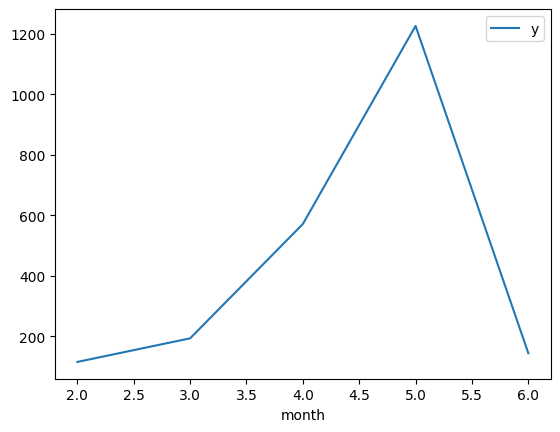

In [15]:
mocha_orders.plot(x='month',y='y')

/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/anshumantiwari/Documents/code/practise/AI/Python/ML/.conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



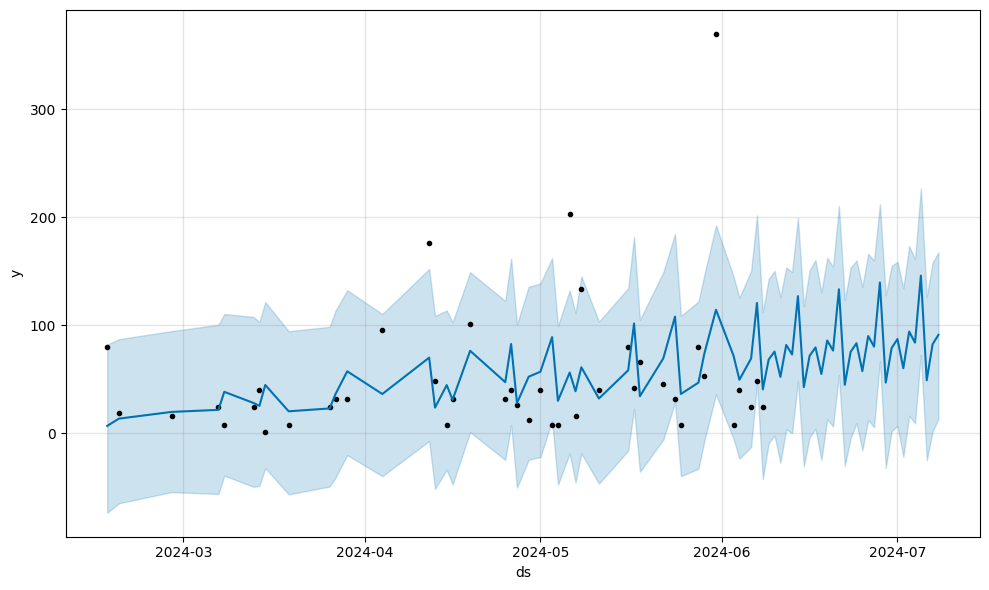

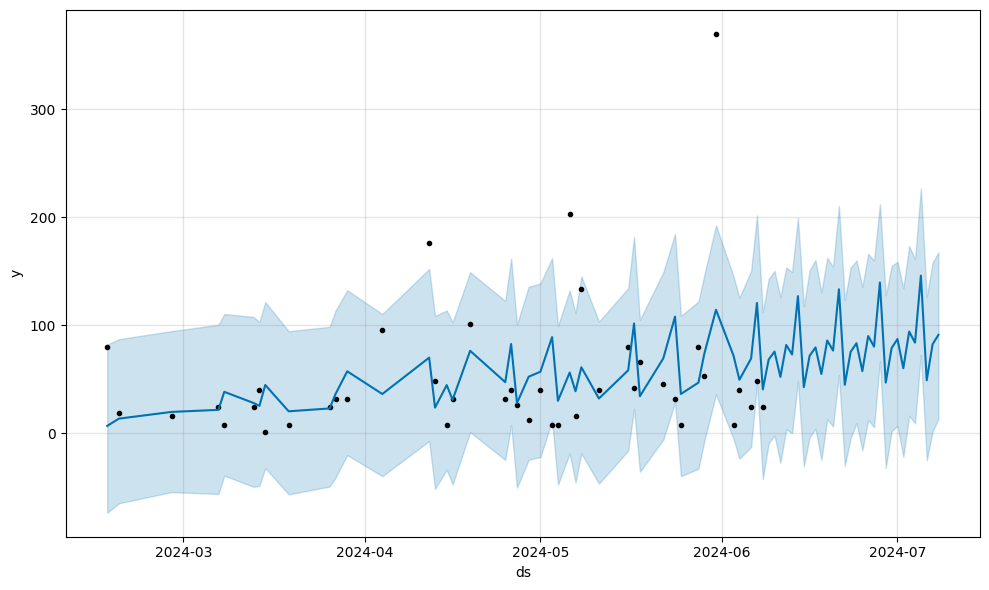

In [44]:
model_prophet.plot(forecast)

In [43]:
print(sum_of_orders_next_30_days)

2126


In [21]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from prophet import Prophet
import streamlit as st


def install_requirements():
    os.system('pip3 install -r requirements.txt')

def preprocess_data(orders): 
    orders['Qty'].fillna(orders['Qty'].mean(), inplace=True)
    
    q_low = orders['Qty'].quantile(0.01)
    q_high = orders['Qty'].quantile(0.99)

    orders = orders[(orders['Qty'] >= q_low) & (orders['Qty'] <= q_high)]
    
    return orders

def load_data():
    orders = pd.read_excel("orders.xlsx")   
    orders['Invoice Date'] = pd.to_datetime(orders['Invoice Date'])
    orders = preprocess_data(orders) 
    orders = orders[['Product Name','Qty','Invoice Date']]

    return orders

def create_models(orders):
    product_models = {}

    products = orders['Product Name'].unique()

    for product in products:
        product_data = orders[orders['Product Name'] == product]
        if len(product_data) > 3:
            
            aggregated_data = product_data.groupby('Invoice Date')['Qty'].sum().reset_index()
            aggregated_data_prophet = aggregated_data.rename(columns={'Invoice Date': 'ds', 'Qty': 'y'})
            aggregated_data_prophet['cap'] = aggregated_data_prophet['y'].max()

            model = Prophet(
                weekly_seasonality=True,
                daily_seasonality=True,
                changepoints=list(aggregated_data_prophet['ds']),
                growth='logistic'
            )
            model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model.fit(aggregated_data_prophet) 

            product_models[product] = model
    
    return product_models 

def predict_next_30_days(product_name, product_models, orders):
    if product_name in product_models:
        model = product_models[product_name]

        future = model.make_future_dataframe(periods=30)
        future['cap'] = orders[orders['Product Name'] == product_name].groupby('Invoice Date')['Qty'].sum().max()

        forecast = model.predict(future)
        forecast['yhat'] = forecast['yhat'].astype(int)

        accuracy = model.plot_components(forecast)
        st.pyplot(accuracy)

        fig1 = model.plot(forecast)
        plt.title(f'{product_name} Orders Forecast')
        plt.xlabel('Date')
        plt.ylabel('Quantity')
        st.pyplot(fig1)

        next_30_days = forecast['yhat'].tail(30)
        st.write(f'Predicted next 30 days: {next_30_days.sum()}')

        fig2 = plt.figure(figsize=(12, 6))
        plt.plot(orders['Invoice Date'], orders['Qty'], label='Actual')
        plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
        plt.legend()
        st.pyplot(fig2)

        fig3, ax = plt.subplots(figsize=(10, 6))
        ax.plot(next_30_days['ds'], next_30_days['yhat'], marker='o', linestyle='-', color='b')
        ax.set_title(f'Predicted Order Quantities for the Next 30 Days for {product_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Predicted Quantity')
        ax.grid(True)
        plt.xticks(rotation=45)

        return fig1, fig2, fig3 , next_30_days

    else:
        st.write(f"Product '{product_name}' not found in the data.")
        return None, None, None
    


orders = load_data()
product_models = create_models(orders)

predict_next_30_days('Kerala banana chips - Original Style- 85G', product_models,orders)

        

/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_15949/69956902.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['Invoice Date'] = pd.to_datetime(orders['Invoice Date'])
/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_15949/69956902.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['Qty'].fillna(orders['Qty'].mean(), inplace=True)
21:32:07 - cmdsta

IndexError: index 0 is out of bounds for axis 0 with size 0

In [25]:
# %%
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from prophet import Prophet
import streamlit as st
import os


def install_requirements():
    os.system('pip3 install -r requirements.txt')

def load_data():
    orders = pd.read_excel("orders.xlsx")   
    orders['Invoice Date'] = pd.to_datetime(orders['Invoice Date'])
    orders = preprocess_data(orders) 
    orders = orders[['Product Name','Qty','Invoice Date']]

    return orders

def preprocess_data(orders): 
    orders['Qty'].fillna(orders['Qty'].mean(), inplace=True)
    
    q_low = orders['Qty'].quantile(0.01)
    q_high = orders['Qty'].quantile(0.99)

    orders = orders[(orders['Qty'] >= q_low) & (orders['Qty'] <= q_high)]
    
    return orders

def create_models(orders):
    product_models = {}
    products = orders['Product Name'].unique()
    
    for product in products:
        product_data = orders[orders['Product Name'] == product]
        if len(product_data) > 2:
            aggregated_data = product_data.groupby('Invoice Date')['Qty'].sum().reset_index()
            aggregated_data_prophet = aggregated_data.rename(columns={'Invoice Date': 'ds', 'Qty': 'y'})
            aggregated_data_prophet['cap'] = aggregated_data_prophet['y'].max()

            model = Prophet(
                weekly_seasonality=True,
                daily_seasonality=True, 
                growth='logistic'
            )
            
            model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model.fit(aggregated_data_prophet) 

            product_models[product] = model
    
    return product_models, products

def predict_next_30_days(product_name, product_models,orders):
    if product_name in product_models:
        model = product_models[product_name]

        future = model.make_future_dataframe(periods=30)
        future['cap'] = orders[orders['Product Name'] == product_name].groupby('Invoice Date')['Qty'].sum().max()
       
        forecast = model.predict(future)
        forecast['yhat'] = forecast['yhat'].astype(int)

        accuracy = model.plot_components(forecast)
        st.pyplot(accuracy)
        
        fig1 = model.plot(forecast)
        plt.title(f'{product_name} Orders Forecast')
        plt.xlabel('Date')
        plt.ylabel('Quantity')
        st.pyplot(fig1)
        
        next_30_days = forecast[['ds', 'yhat']].tail(30)

        orders_sum = next_30_days['yhat'].sum()
        st.write(f'Predicted next 30 days: {orders_sum}')

        fig2, ax = plt.subplots(figsize=(10, 6))
        ax.plot(next_30_days['ds'], next_30_days['yhat'], marker='o', linestyle='-', color='b')
        ax.set_title(f'Predicted Order Quantities for the Next 30 Days for {product_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Predicted Quantity')
        ax.grid(True)
        plt.xticks(rotation=45)
        
        return fig1, fig2, next_30_days
    else:
        st.write(f"Product '{product_name}' not found in the data.")
        return None, None, None

        
def main():
    st.title("Product Quantity Forecast")
    st.write("Select a product to view the quantity forecast for the next 30 days.")
    
    orders = load_data()
    product_models, products = create_models(orders)
    
    product_name = st.selectbox("Select a Product", products)
    
    if product_name:
        fig1, fig2, predictions  = predict_next_30_days(product_name, product_models,orders)
        if fig1 and fig2:
            st.write("Forecast for the next 30 days:")
            st.pyplot(fig1)
            st.pyplot(fig2)
            st.write(predictions)

if __name__ == "__main__":
    orders = load_data()
    #install_requirements()
    main()


/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_15949/2270748935.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders['Invoice Date'] = pd.to_datetime(orders['Invoice Date'])
/var/folders/8v/873bldk974b8mtq4xyw0gtn00000gn/T/ipykernel_15949/2270748935.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['Qty'].fillna(orders['Qty'].mean(), inplace=True)
/var/folders/